# **ML Project for Customer Lifetime Value Prediction in Telecom**

CLTV analysis enables companies to identify high-value customers, develop personalized retention strategies, and allocate marketing resources accordingly. It also helps companies optimize their sales and pricing strategies, improve customer satisfaction, and reduce churn rate.

In this project, we will be exploring different CLTV calculation methods, and analyzing feature importance to determine the most influential factors on CLTV.

We will also be identifying high-value customers based on their CLTV scores, analyzing their characteristics and behavior, and providing suggestions for targeted marketing and retention strategies.



## **Approach**

* Introduction
    * Brief overview of the project

* Data Processing

* Exploratory data analysis (EDA)
  * ARPU Analysis
  * Customer Lifetime Analysis

* Customer Lifetime Value
    * Overview of different CLTV calculation methods (e.g., historical, predictive, probabilistic, etc)
    * CLTV Calculation: Historical Data
    * Rule Based Customer Segmentation
    * Analyzing customers for each perspective, i.e. customer churn, loyalty, and retention

* Feature Importance
    * Identification of important services affecting CLTV
    * Correlation analysis to measure the impact of various factors on CLTV

* High-Value Customer Identification
    * Identification of high-value customers based on CLTV scores
    * Analysis of their characteristics and behavior
    * Suggestions for targeted marketing, retention strategies



* Project Summary

## **Package Requirements**

In [1]:
# using warnings module to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Libraries
import pandas as pd
import numpy as np

# sets the maximum number of columns that will be displayed in a dataframe to 200 for improved data viewing
pd.set_option('display.max_columns', 200)
# EDA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind



In [3]:
# Data Reading
df = pd.read_csv("/Users/marc/coding/private/public_repo/cltv_analysis/Telecom_Data (1).csv")

In [4]:
# Head
df.head()

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,night_pck_user,fb_user,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,Customer Status,offer
0,hthjctifkiudi0,1,1.0,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,NaN,38.30,219.25,Not Applicable,Not Applicable,NaN,NaN,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,Churned,A
1,uqdtniwvxqzeu1,6,6.0,72566,Male,36.657198,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183.0,0.0,0.00,0.00,0.0,0.0,0.0,1.0,0.00,0,No,0.0,Yes,Yes,No,NaN,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,Stayed,F
2,uqdtniwvxqzeu1,7,6.0,72566,Male,36.607828,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0.0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295.0,7.0,14.83,967.95,-9.4,106.3,1.0,1.0,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,Stayed,No Offer
3,uqdtniwvxqzeu1,8,6.0,72566,Male,36.943638,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,215.48,84.18,99.85,140.51,4006.990000,280.86,6.33,346.14,103.15,183.530000,0.0,33.88,495.60,14.01,658.96,195.02,144.11,50.18,2.35,623.94,0.0,0.07,69.13,10.62,354.0,1.0,264.90,268.11,-5.15,77.53,0.0,1.0,268.38,0,Yes,10.0,Yes,No,Yes,Fiber Optic,57,No,No,Yes,No,Yes,No,No,Yes,Wallet Balance,cdwbcrvylqca53109,4,Not Applicable,Not Applicable,Stayed,J
4,uqdtniwvxqzeu1,9,6.0,72566,Male,36.632494,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,636.55,0.00,0.00,0.00,0.000000,0.00,0.00,0.00,0.00,0.000000,0.0,0.00,0.00,0.00,138.85,201.92,19.89,15.91,23.78,16.01,0.0,0.03,64.35,36.18,0.0,NaN,52.78,370.59,Not Applicable,Not Applicable,NaN,NaN,399.84,0,Yes,1.0,No,No,Yes,Fiber Optic,38,No,No,No,No,No,Yes,No,Yes,Credit Card,whqrmeulitfj98550,1,Not Applicable,Not Applicable,Stayed,No Offer


In [5]:
# Information on nulls and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 74 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer ID                 653753 non-null  object 
 1   Month                       653753 non-null  int64  
 2   Month of Joining            653753 non-null  float64
 3   zip_code                    653753 non-null  int64  
 4   Gender                      653753 non-null  object 
 5   Age                         653753 non-null  float64
 6   Married                     653753 non-null  object 
 7   Dependents                  653753 non-null  object 
 8   Number of Dependents        648808 non-null  float64
 9   Location ID                 653753 non-null  object 
 10  Service ID                  653753 non-null  object 
 11  state                       653753 non-null  object 
 12  county                      653753 non-null  object 
 13  timezone      

In [6]:
# All the columns
df.columns

Index(['Customer ID', 'Month', 'Month of Joining', 'zip_code', 'Gender', 'Age',
       'Married', 'Dependents', 'Number of Dependents', 'Location ID',
       'Service ID', 'state', 'county', 'timezone', 'area_codes', 'country',
       'latitude', 'longitude', 'arpu', 'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'night_pck_user', 'fb_user', 'aug_vbc_5g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Suppo

## **Data Dictionary**

| Column name	 | Description|
| ----- | ----- |
| Customer ID	 | Unique identifier for each customer |
| Month | Calendar Month- 1:12 |
| Month of Joining |	Calender Month -1:14, Month for which the data is captured|
| zip_code |	Zip Code|
|Gender |	Gender|
| Age |	Age(Years)|
| Married |	Marital Status |
|Dependents | Dependents - Binary |
| Number of Dependents |	Number of Dependents|
|Location ID |	Location ID|
|Service ID	 |Service ID|
|state|	State|
|county	|County|
|timezone	|Timezone|
|area_codes|	Area Code|
|country	|Country|
|latitude|	Latitude|
|longitude	|Longitude|
|arpu|	Average revenue per user|
|roam_ic	|Roaming incoming calls in minutes|
|roam_og	|Roaming outgoing calls in minutes|
|loc_og_t2t|	Local outgoing calls within same network in minutes|
|loc_og_t2m	|Local outgoing calls outside network in minutes(outside same + partner network)|
|loc_og_t2f|	Local outgoing calls with Partner network in minutes|
|loc_og_t2c	|Local outgoing calls with Call Center in minutes|
|std_og_t2t|	STD outgoing calls within same network in minutes|
|std_og_t2m|	STD outgoing calls outside network in minutes(outside same + partner network)|
|std_og_t2f|	STD outgoing calls with Partner network in minutes|
|std_og_t2c	|STD outgoing calls with Call Center in minutes|
|isd_og|	ISD Outgoing calls|
|spl_og	|Special Outgoing calls|
|og_others|	Other Outgoing Calls|
|loc_ic_t2t|	Local incoming calls within same network in minutes|
|loc_ic_t2m|	Local incoming calls outside network in minutes(outside same + partner network)|
|loc_ic_t2f	|Local incoming calls with Partner network in minutes|
|std_ic_t2t	|STD incoming calls within same network in minutes|
|std_ic_t2m	|STD incoming calls outside network in minutes(outside same + partner network)|
|std_ic_t2f|	STD incoming calls with Partner network in minutes|
|std_ic_t2o|	STD incoming calls operators other networks in minutes|
|spl_ic|	Special Incoming calls in minutes|
|isd_ic|	ISD Incoming calls in minutes|
|ic_others|	Other Incoming Calls|
|total_rech_amt|	Total Recharge Amount in Local Currency|
|total_rech_data|	Total Recharge Amount for Data in Local Currency
|vol_4g|	4G Internet Used in GB|
|vol_5g|	5G Internet used in GB|
|arpu_5g|	Average revenue per user over 5G network|
|arpu_4g|	Average revenue per user over 4G network|
|night_pck_user|	Is Night Pack User(Specific Scheme)|
|fb_user|	Social Networking scheme|
|aug_vbc_5g|	Volume Based cost for 5G network (outside the scheme paid based on extra usage)|
|offer|	Offer Given to User|
|Referred a Friend|	Referred a Friend : Binary|
|Number of Referrals|	Number of Referrals|
|Phone Service|	Phone Service: Binary|
|Multiple Lines|	Multiple Lines for phone service: Binary|
|Internet Service|	Internet Service: Binary|
|Internet Type|	Internet Type|
|Streaming Data Consumption|	Streaming Data Consumption|
|Online Security|	Online Security|
|Online Backup|	Online Backup|
|Device Protection Plan|	Device Protection Plan|
|Premium Tech Support|	Premium Tech Support|
|Streaming TV|	Streaming TV|
|Streaming Movies|	Streaming Movies|
|Streaming Music|	Streaming Music|
|Unlimited Data|	Unlimited Data|
|Payment Method|	Payment Method|
|Status ID|	Status ID|
|Satisfaction Score|	Satisfaction Score|
|Churn Category|	Churn Category|
|Churn Reason|	Churn Reason|
|Customer Status|	Customer Status|
|Churn Value|	Binary Churn Value



In [7]:
# Null values in total recharge data
df['total_rech_data'].isna().sum()

209904

In [8]:
# Null values in Internet Type
df['Internet Type'].isna().sum()

217332

In [9]:
# Missing value percentage
df['total_rech_data'].isna().sum()/df.shape[0]

0.321075390858627

**Observation:**

*  These missing values may represent customers who have not recharged their account or have recharged but the information has not been recorded.

* It is possible that customers with missing recharge data are those who received free data service, and therefore did not need to recharge their account. Alternatively, it is possible that the missing values are due to technical issues, such as data recording errors or system failures.

In [10]:
# Checking the value counts of Internet Service where total recharge data was null
df[df['total_rech_data'].isna()]['Internet Service'].value_counts(dropna=False)

Yes    209904
Name: Internet Service, dtype: int64

**Observation**:

* It turns out that all customers with missing recharge data have opted for internet service, the next step could be to check if they have used it or not.

In [11]:
# Let's check unlimited data column
df[(df['total_rech_data'].isna())]['Unlimited Data'].value_counts()

Yes    181040
No      28864
Name: Unlimited Data, dtype: int64

In [12]:
# Lets check Average Revenue for 4g and 5g
df[(df['total_rech_data'].isna())][['arpu_4g','arpu_5g']].value_counts()

arpu_4g         arpu_5g          
Not Applicable  Not Applicable       195182
297.57          8530.983628675234         4
544.17          8536.565905559388         3
395.94          8533.210427446906         3
290.09          8530.814304137142         3
                                      ...  
222.42          1468.94                   1
222.56          8529.285629530546         1
222.67          8529.288119597282         1
222.73          8529.289477815502         1
2559.56         8582.188229199097         1
Length: 14247, dtype: int64

**Observation**:

* We can fill the missing values in the total_rech_data column with 0 when the arpu (Average Revenue Per User) is not applicable. This is because the arpu is a measure of the revenue generated per user, and if it is not applicable, it may indicate that the user is not generating any revenue for the company. In such cases, it is reasonable to assume that the total recharge amount is 0.

In [13]:
# Check the value counts of ARPU 4g and 5g
df[['arpu_4g','arpu_5g']].value_counts()

arpu_4g         arpu_5g       
Not Applicable  Not Applicable    195182
0.0             0.0               184117
                63.0               13024
63.0            0.0                12969
254687.0        0.0                10911
                                   ...  
192.88          566.93                 1
192.89          274.15                 1
                2848.71                1
                648.54                 1
2416.82         167.18                 1
Length: 195845, dtype: int64

In [14]:
# Replacing all values of total recharge data= 0 where arpu 4g and 5g are not applicable
df.loc[(df['arpu_4g']=='Not Applicable') | (df['arpu_5g']=='Not Applicable'),'total_rech_data']=0

In [15]:
# Missing value percentage
df['total_rech_data'].isna().sum()/df.shape[0]

0.022519208324856637

We cannot fill other values with 0 because they have some ARPU to consider.

In [16]:
# Calculate the mean of 'total_rech_data' where either 'arpu_4g' or 'arpu_5g' is not equal to 'Not Applicable'
df.loc[(df['arpu_4g']!='Not Applicable') | (df['arpu_5g']!='Not Applicable'),'total_rech_data'].mean()

4.85274721808543

With this mean, we will fill the NaN values.

In [17]:
# Fill NaN values in 'total_rech_data' with the mean of 'total_rech_data' where either 'arpu_4g' or 'arpu_5g' is not equal to 'Not Applicable'
df['total_rech_data']=df['total_rech_data'].fillna(df.loc[(df['arpu_4g']!='Not Applicable') | (df['arpu_5g']!='Not Applicable'),'total_rech_data'].mean())

In [18]:
# Check the value counts for Internet Type
df['Internet Type'].value_counts(dropna=False)

NaN            217332
Fiber Optic    134991
Cable          112100
None           107918
DSL             81412
Name: Internet Type, dtype: int64

In [19]:
# Check value counts for Internet Service where Internet Type is null
df[df['Internet Type'].isna()]['Internet Service'].value_counts(dropna=False)

No    217332
Name: Internet Service, dtype: int64

All null values in Internet Type does not have Internet Service. Let's fill these null values with Not Applicable.

In [20]:
# Filling Null values in Internet Type
df['Internet Type']=df['Internet Type'].fillna('Not Applicable')

In [21]:
# Shape of the dataframe
df.shape

(653753, 74)

In [22]:
# Insert a new column named 'total_recharge' before the last column in the dataframe
# The values of 'total_recharge' are the sum of 'total_rech_amt' and 'total_rech_data'
df.insert(loc=df.shape[1]-1,column='total_recharge',value=df['total_rech_amt']+df['total_rech_data'])

In [23]:
# Checking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
fb_user,62.78
night_pck_user,57.07
Number of Dependents,0.76
Number of Referrals,0.06
Customer ID,0.00
...,...
std_og_t2t,0.00
loc_og_t2c,0.00
loc_og_t2f,0.00
loc_og_t2m,0.00


Let's drop some unnecessary columns!

In [24]:
# Dropping columns
df=df.drop(columns=['night_pck_user', 'fb_user', 'Customer Status'])

Replace 'Not Applicable' with 0 in both 'arpu_4g' and 'arpu_5g'.

In [25]:
# Replace 'Not Applicable' with 0 in 'arpu_4g'
df['arpu_4g'] = df['arpu_4g'].replace('Not Applicable', 0)

# Replace 'Not Applicable' with 0 in 'arpu_5g'
df['arpu_5g'] = df['arpu_5g'].replace('Not Applicable', 0)

# Convert 'arpu_4g' to float data type
df['arpu_4g'] = df['arpu_4g'].astype(float)

# Convert 'arpu_5g' to float data type
df['arpu_5g'] = df['arpu_5g'].astype(float)


In [26]:
# Check the data types
df.dtypes

Customer ID            object
Month                   int64
Month of Joining      float64
zip_code                int64
Gender                 object
                       ...   
Satisfaction Score      int64
Churn Category         object
Churn Reason           object
total_recharge        float64
offer                  object
Length: 72, dtype: object

In [27]:
# List of continuous columns
cts_cols=['Age','Number of Dependents',
       'roam_ic', 'roam_og', 'loc_og_t2t',
       'loc_og_t2m', 'loc_og_t2f', 'loc_og_t2c', 'std_og_t2t', 'std_og_t2m',
       'std_og_t2f', 'std_og_t2c', 'isd_og', 'spl_og', 'og_others',
       'loc_ic_t2t', 'loc_ic_t2m', 'loc_ic_t2f', 'std_ic_t2t', 'std_ic_t2m',
       'std_ic_t2f', 'std_ic_t2o', 'spl_ic', 'isd_ic', 'ic_others',
       'total_rech_amt', 'total_rech_data', 'vol_4g', 'vol_5g', 'arpu_5g',
       'arpu_4g', 'arpu', 'aug_vbc_5g', 'Number of Referrals','Satisfaction Score',
       'Streaming Data Consumption']



### **Outlier Detection Notes**:

Outlier detection is a critical data analysis technique that involves identifying and removing data points that are significantly different from the rest of the data. Outliers are data points that lie far away from the rest of the data, and they can significantly influence the statistical analysis and machine learning models' performance. Therefore, identifying and removing outliers is essential to ensure accurate and reliable data analysis results.

There are two main approaches for outlier detection: parametric and non-parametric.

* Parametric Methods:
Parametric methods assume that the data follows a specific distribution, such as a normal distribution. In this approach, outliers are identified by calculating the distance of each data point from the mean of the distribution in terms of the number of standard deviations. Data points that are beyond a certain number of standard deviations (usually three or more) are considered as outliers.

One common parametric method is the Z-score method, which calculates the distance of each data point from the mean in terms of standard deviations.
Parametric methods can be useful when the data follows a known distribution, but they may not be effective when the data is not normally distributed.

* Non-Parametric Methods:
Non-parametric methods do not assume any specific distribution of the data. Instead, they rely on the rank or order of the data points. In this approach, outliers are identified by comparing the values of each data point with the values of other data points. Data points that are significantly different from other data points are considered as outliers.

Quantiles are an important concept in non-parametric outlier detection methods. They represent values that divide a dataset into equal-sized parts, such as quarters or thirds. The most commonly used quantiles are the median (which divides the data into two equal parts), the first quartile (which divides the data into the lowest 25% and the highest 75%), and the third quartile (which divides the data into the lowest 75% and the highest 25%).

The interquartile range (IQR) is another important concept related to quantiles. It is defined as the difference between the third and first quartiles and represents the middle 50% of the data. The IQR can be used to identify outliers by defining a range (known as the Tukey's fence) beyond which any data points are considered outliers.
Non-parametric methods can be useful when the data is not normally distributed or when the distribution is unknown.

In [28]:
# Create an empty dataframe with columns as cts_cols and index as quantiles
quantile_df=pd.DataFrame(columns=cts_cols,index=[0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99])
mo_distance("fcTel4")
# for each column in cts_cols, calculate the corresponding quantiles and store them in the quantile_df
for col in cts_cols:
   quantile_df[col]=df[col].quantile([0.1,0.25,0.5,0.75,0.8,0.9,0.95,0.97,0.99])

NameError: name 'mo_distance' is not defined

By calculating quantiles for each continuous variable in the dataset, we are trying to get an idea about the spread and distribution of the data. Specifically, we are interested in identifying potential outliers in the data.

Quantiles divide a distribution into equal proportions. For instance, the 0.25 quantile is the value below which 25% of the observations fall and the 0.75 quantile is the value below which 75% of the observations fall. By calculating quantiles at various levels, we can get a better understanding of the distribution of the data and identify any observations that are too far away from the rest of the data.

These quantiles can be used as thresholds to identify potential outliers in the data. Observations with values beyond these thresholds can be considered as potential outliers and further investigation can be carried out to determine if they are true outliers or not.

In [ ]:
# Let's check out the quantiles df
quantile_df

,Age,Number of Dependents,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,arpu,aug_vbc_5g,Number of Referrals,Satisfaction Score,Streaming Data Consumption
0.10,24.0,0.0,0.000000,0.000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.00,0.0,0.000000,0.000000,0.0000,34.740000,33.790000,14.4600,16.950000,13.060000,5.030,0.0,0.02,10.770000,8.100000,0.0,0.000000,0.0000,0.0000,0.000000,0.000000,-256.2000,0.0000,0.0,1.0,0.0
0.25,28.0,0.0,12.090000,14.710,32.700000,26.2600,1.460000,1.6100,33.120000,25.560000,1.20,0.0,3.250000,4.940000,3.4300,85.570000,84.170000,36.1100,42.460000,32.190000,12.460,0.0,0.04,26.980000,20.330000,72.0,0.000000,0.0000,0.0000,0.000000,0.000000,118.9400,0.0000,0.0,3.0,2.0
0.50,34.0,0.0,50.560000,75.100,171.330000,135.4600,7.800000,8.1800,174.600000,134.800000,6.34,0.0,17.190000,25.580000,17.8300,171.490000,168.390000,72.0600,84.470000,64.760000,24.980,0.0,0.08,53.700000,40.540000,374.0,0.000000,47.0100,274.1100,0.000000,0.000000,348.5400,117.3200,4.0,3.0,20.0
0.75,43.0,1.0,162.030000,135.290,309.090000,618.2300,14.090000,14.7000,316.240000,244.490000,36.64,0.0,31.140000,46.190000,106.7800,1259.260000,1090.080000,496.7900,126.270000,448.820000,186.720,0.0,0.21,80.370000,60.730000,1089.0,2.000000,154.9000,895.8100,194.470000,228.220000,580.6500,311.7200,8.0,4.0,49.0
0.80,47.0,2.0,496.935485,146.820,856.841431,1392.8500,43.876522,15.9700,344.970000,266.540000,71.61,0.0,33.910000,50.240000,229.2460,1999.702000,1471.760000,653.0600,543.125842,634.003448,275.200,0.0,0.33,384.834562,64.800000,2197.0,4.852747,176.3600,1654.5460,789.000000,783.290000,626.2300,350.5000,8.0,4.0,56.0
0.90,55.0,4.0,969.048000,689.608,3614.015883,2644.5980,126.595429,109.0980,1547.160000,1007.728354,143.14,0.0,113.181983,372.788742,382.7200,2974.572396,2424.836361,1198.6180,1525.968000,1030.546647,466.868,0.0,0.71,1102.783115,532.388000,7013.0,14.000000,219.2680,9658.3760,2219.752000,2224.100000,1901.5140,789.0000,10.0,5.0,69.0
0.95,61.0,7.0,1283.198000,1954.392,5079.830000,3479.4380,183.494000,207.5140,3953.491029,3108.254000,171.80,0.0,319.290206,470.140200,489.7000,3719.724000,3166.706000,1462.3020,2022.064442,1360.444000,569.740,0.0,1.27,1443.949075,914.270266,9369.0,23.000000,663.2040,14517.6400,8530.865147,8675.302558,5892.6180,3943.2100,11.0,5.0,77.0
0.97,64.0,8.0,1494.043200,2550.390,5806.054400,3756.4444,206.744400,277.3444,5344.227818,3848.534961,188.88,0.0,394.208100,518.359307,531.5700,3911.517600,3468.838800,1657.1832,2145.504400,1476.410000,594.000,0.0,1.75,1554.890000,1212.837600,10492.0,26.000000,1438.5100,16580.3764,8724.440600,8839.721689,7592.5688,5949.3792,11.0,5.0,80.0
0.99,74.0,9.0,1646.899600,3041.760,6191.204000,4060.2988,257.650000,311.4648,6729.403200,4875.008539,208.18,0.0,637.009600,836.140000,579.3748,4200.448800,3679.364400,1792.9848,2434.554800,1571.760000,639.000,0.0,2.19,1601.920000,1317.510000,11367.0,30.000000,4289.8496,18614.5528,254687.000000,254687.000000,8846.9584,7366.7684,11.0,5.0,83.0


Outliers were detected in the variables vol_5g, arpu_4g, and arpu_5g.

In [ ]:
# Checking further
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750       228.220000
0.800       783.290000
0.900      2224.100000
0.950      8675.302558
0.970      8839.721689
0.990    254687.000000
0.999    254687.000000
Name: arpu_4g, dtype: float64

In [ ]:
# Calculate the proportion of rows in the DataFrame where the value in the 'arpu_4g' column is equal to 254687
df[df['arpu_4g']==254687].shape[0]/df.shape[0]

0.019651152652454366

In [ ]:
# Let's check it out
df[df['arpu_4g']==254687]

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer
9,uqdtniwvxqzeu1,14,6.0,72566,Male,36.463423,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,1330.04,1582.05,157.20,161.810000,1827.38,39.790000,1.00,1362.59,5267.31,171.81,0.0,390.32,24.940000,511.23,2128.610000,2896.11,54.41,100.540000,585.44,162.70,0.0,0.11,10.460000,1247.37,255.0,0.0,0.0,0.0,254687.0,254687.0,0.0,0,Yes,9.0,Yes,No,No,Not Applicable,74,No,No,Yes,No,Yes,No,No,No,Credit Card,inebwpymzwpup39698,4,Not Applicable,Not Applicable,255.0,No Offer
86,ucpurmfkdlnwi18,13,12.0,71747,Female,20.000000,Yes,No,0.0,rqiqguxisfoc18,dkupusivpzrazcfsdi18,AR,Union County,America/Chicago,870.0,US,33.04,-92.18,160.07,18.63,31.29,2894.413815,834.78,209.170000,9.59,177.64,116.17,120.34,0.0,14.74,439.340381,100.81,156.270000,254.19,29.68,998.828718,24.13,12.62,0.0,0.29,795.194692,5.06,8462.0,0.0,0.0,0.0,0.0,254687.0,0.0,0,Yes,6.0,Yes,Yes,No,Not Applicable,0,No,No,No,Yes,No,No,No,No,Bank Withdrawal,usfobpyxwqrkg27554,5,Not Applicable,Not Applicable,8462.0,No Offer
103,sirifvlkipkel21,13,11.0,92865,Female,40.000000,Yes,No,0.0,jobplwgowgko21,zmuwwsnfbwxxdxzuvz21,CA,Orange County,America/Los_Angeles,714.0,US,33.83,-117.85,478.77,26.04,72.49,111.050000,1.87,6.890000,4.83,11.50,134.28,6.71,0.0,31.44,6.230000,2.70,171.280000,167.16,15.18,54.880000,64.06,31.83,0.0,0.01,41.910000,61.24,417.0,0.0,0.0,0.0,0.0,254687.0,0.0,0,Yes,0.0,Yes,Yes,No,Not Applicable,56,No,Yes,Yes,No,Yes,Yes,Yes,No,Credit Card,cullucfodcpbc24549,3,Not Applicable,Not Applicable,417.0,No Offer
112,dnnrchjlmrylq24,14,9.0,91423,Female,48.000000,Yes,Yes,0.0,vxainqiqplai24,liroqcvpdnrzdyolqw24,CA,Los Angeles County,America/Los_Angeles,2.13e+17,US,34.14,-118.42,143.68,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,149.180000,2769.19,207.23,33.720000,331.07,3.33,0.0,0.06,0.090000,2.56,0.0,0.0,0.0,0.0,0.0,254687.0,0.0,0,Yes,6.0,No,Yes,No,Not Applicable,51,No,Yes,Yes,No,No,Yes,Yes,No,Bank Withdrawal,qflywarsexbpg13676,4,Not Applicable,Not Applicable,0.0,G
145,pltaycxycbhvo31,11,7.0,95126,Other,35.000000,No,No,0.0,sjmjgqjvhvth31,xbmtjtsvypinczxnhf31,CA,Santa Clara County,America/Los_Angeles,408.0,US,37.32,-121.91,95.40,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.00,0.0,0.00,0.000000,0.00,3210.570000,525.28,136.57,19.790000,1.21,202.92,0.0,0.05,61.380000,52.97,0.0,0.0,0.0,0.0,0.0,254687.0,0.0,0,Yes,10.0,No,No,No,Cable,56,No,Yes,No,No,No,Yes,Yes,No,Bank Withdrawal,xayhhjriwxte83055,3,Not Applicable,Not Applicable,0.0,J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653317,tphemcbndfpem162885,5,5.0,91604,Female,23.000000,Yes,Yes,9.0,psxavglkqzny162885,lepgdnuzszymxfxefi162885,CA,Los Angeles County,America/Los_Angeles,213.0,US,34.13,-118.39,576.68,1555.64,148.54,286.060000,2640.98,11.450000,15.25,177.76,80.32,182.42,0.0,36.39,29.010000,12.66,149.150000,254.42,34.55,70.130000,866.24,21.63,0.0,0.02,8.530000,13.05,6036.0,0.0,0.0,0.0,

Let's see what is the value of 'total_rech_data' for these observations.

In [ ]:
# Get the value counts of 'total_rech_data' for observations where the value in the 'arpu_4g' column is equal to 254687
df[df['arpu_4g']==254687]['total_rech_data'].value_counts()

0.0    12847
Name: total_rech_data, dtype: int64

Now, since the recharge amount is 0 and there is no ARPU, let's replace it with 0.

In [ ]:
# Replace the outlier value 254687 in the 'arpu_4g' column of the dataframe 'df' with 0.
df['arpu_4g']=df['arpu_4g'].replace(254687,0)


In [ ]:
# Checking further
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750      120.570000
0.800      504.112000
0.900     1893.758000
0.950     2493.880000
0.970     8675.470757
0.990     8839.721689
0.999    87978.000000
Name: arpu_4g, dtype: float64

In [ ]:
# Filter by 'arpu_4g' value of 87978 and count unique values in 'total_rech_data' column
df[df['arpu_4g']==87978]['total_rech_data'].value_counts()

0.0    5007
Name: total_rech_data, dtype: int64

All rows in the dataframe with an 'arpu_4g' value of 87978 have 0 value in the 'total_rech_data' column, indicating that these are likely outliers. Therefore, we have decided to replace the 'arpu_4g' value for these rows with 0.

In [ ]:
# Replace the values with 0
df['arpu_4g']=df['arpu_4g'].replace(87978,0)

In [ ]:
# Checking the quantiles again
df['arpu_4g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     107.760000
0.800     432.246000
0.900    1803.560000
0.950    2424.072000
0.970    2735.554400
0.990    8705.097343
0.999    8839.721689
Name: arpu_4g, dtype: float64

In [ ]:
# Check the churn value for this ARPU
df[df['arpu_4g']>8000]['Churn Value'].value_counts()

0    16157
1      980
Name: Churn Value, dtype: int64

**Observation:**

 * A higher ARPU suggests that a business is generating more revenue per user, which can be a positive sign for the business's profitability. However, a high ARPU can also imply churn, or the rate at which customers are leaving the business. (i.e. if a business is charging a high price for its services, it may attract a customer base that is more price-sensitive and likely to switch to a competitor if they find a better deal. This could result in a higher churn rate for the business.)


In [ ]:
# Check the value counts of total recharge data at outlying values
df[df['arpu_5g']==254687]['total_rech_data'].value_counts()

0.0    12614
Name: total_rech_data, dtype: int64

In [ ]:
# Check the value counts of total recharge data at outlying values
df[df['arpu_5g']==87978]['total_rech_data'].value_counts()

0.0    5130
Name: total_rech_data, dtype: int64

In [ ]:
# Replacing the values with 0 where total recharge data is 0
df['arpu_5g']=df['arpu_5g'].replace([87978,254687],0)

In [ ]:
# Check the quantiles of ARPU 5G
df['arpu_5g'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750      96.490000
0.800     417.102000
0.900    1797.618000
0.950    2543.904000
0.970    2792.060000
0.990    8587.153966
0.999    8724.440600
Name: arpu_5g, dtype: float64

**Assumptions**:

To later calculate customer lifetime value (CLTV), we assume

* Incoming usage is free as incoming usage is not a high source of revenue in TelCom

* Outgoing to call center is free as calling the service provider should not result in a cost to the customer.

In [ ]:
# Assuming incoming is free
# We will just keep outgoing and data usage, and premium services columns and assume outgoing to call center is free

# Create a new column for total outgoing call usage
df['outgoing_call_usage'] = df['roam_og'] + df['loc_og_t2t'] + df['loc_og_t2m'] + df['loc_og_t2f']  + df['std_og_t2t'] + df['std_og_t2m'] + df['std_og_t2f'] + df['isd_og'] + df['spl_og'] + df['og_others']

# Create a new column for total data usage
df['data_usage'] = df['vol_4g'] + df['vol_5g'] + df['Streaming Data Consumption']


In [ ]:
# calculate total arpu for each user in each month
df['total_arpu'] = df[['arpu', 'arpu_4g', 'arpu_5g']].sum(axis=1)

In [ ]:
# Removing after 0.90 , replacing them with group medians
df['outgoing_call_usage'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     4436.480000
0.800     5594.251281
0.900     8960.748141
0.950    12312.060683
0.970    14537.184235
0.990    17997.599267
0.999    22152.084652
Name: outgoing_call_usage, dtype: float64

In [ ]:
# Removing after 0.90, replacing them with group medians
df['data_usage'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     1125.82000
0.800     2953.23600
0.900    10039.23000
0.950    14873.23200
0.970    17099.29520
0.990    19111.58200
0.999    21748.18856
Name: data_usage, dtype: float64

In [ ]:
#  Removing after 0.90, replacing them with group medians
df['total_arpu'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     2181.600000
0.800     3066.298000
0.900     5783.486000
0.950     9176.836704
0.970    10687.852517
0.990    17325.527488
0.999    19254.865964
Name: total_arpu, dtype: float64

In [ ]:
# define the columns to check for outliers
cols_to_check = ['outgoing_call_usage', 'data_usage', 'total_arpu']

# calculate the upper bound for outlier detection
q = 0.90
upper_bound = df[cols_to_check].quantile(q)

# replace values above the upper bound with NaN
df[cols_to_check] = df[cols_to_check].mask(df[cols_to_check] > upper_bound, np.nan)

In [ ]:
# Verifying
df['data_usage'].quantile([0.75,0.8,0.9,0.95,0.97,0.99,0.999])

0.750     908.27000
0.800    1026.61000
0.900    3552.40800
0.950    6428.95800
0.970    8309.97120
0.990    9530.69160
0.999    9984.09232
Name: data_usage, dtype: float64

In [ ]:
# Fill na
df['data_usage'] = df['data_usage'].fillna(df['data_usage'].median())
df['outgoing_call_usage'] = df['outgoing_call_usage'].fillna(df['outgoing_call_usage'].median())
df['total_arpu'] = df['total_arpu'].fillna(df['total_arpu'].median())

In [ ]:
# Verify
df[cols_to_check].isnull().sum()

outgoing_call_usage    0
data_usage             0
total_arpu             0
dtype: int64

In [ ]:
# Example churned customer
df[df['Customer ID'] == "tqhiqgvbbhley51"]

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,outgoing_call_usage,data_usage,total_arpu
239,tqhiqgvbbhley51,1,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,401.95,1132.100000,23.78,2019.893046,2943.270000,79.125279,12.17,18.79,1122.93,111.050000,0.0,29.35,234.622548,292.550000,3481.72,2303.090000,469.87,860.779861,1593.800000,400.21,0.0,0.02,643.472745,46.26,7073.0,0.0,0.00,0.00,63.00,0.00,0.00,0,No,0.0,Yes,No,No,Not Applicable,64,No,No,No,Yes,Yes,No,No,No,Bank Withdrawal,pnfzkmmgtfgiyhb85641,1,Not Applicable,Not Applicable,7073.0,B,6875.360874,64.00,464.95
240,tqhiqgvbbhley51,2,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,3494.77,1265.560000,549.44,6001.890000,2595.623151,14.140000,252.98,7341.67,5007.49,139.837265,0.0,214.14,19.690000,391.162815,1431.50,1669.759625,457.05,814.210000,580.859829,152.33,0.0,1.30,481.556391,399.64,291.0,0.0,0.00,0.00,0.00,0.00,0.00,0,No,0.0,Yes,No,No,Not Applicable,77,No,Yes,No,No,Yes,Yes,Yes,No,Bank Withdrawal,tkrvsngmmntne88689,4,Not Applicable,Not Applicable,291.0,No Offer,957.820000,77.00,3494.77
241,tqhiqgvbbhley51,3,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,417.72,91.952452,75.60,238.400000,1051.380000,0.790000,15.98,237.40,7.02,6.620000,0.0,37.57,46.580000,2.730000,1.91,328.860000,15.12,85.420000,26.990000,12.94,0.0,0.01,4.910000,53.61,605.0,18.0,10.61,13222.77,1129.16,2601.66,81.97,0,Yes,3.0,Yes,No,Yes,Fiber Optic,0,No,No,Yes,No,No,No,No,Yes,Bank Withdrawal,mmeqlzplodfzj36241,3,Not Applicable,Not Applicable,623.0,No Offer,1704.090000,308.98,4148.54
242,tqhiqgvbbhley51,4,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,458.10,64.770000,67.20,248.100000,134.460000,2.050000,5.88,497.49,108.95,3.880000,0.0,35.00,0.060000,20.430000,76.22,43.680000,49.94,104.510000,47.120000,10.29,0.0,0.03,101.080000,12.01,310.0,0.0,0.00,0.00,0.00,0.00,0.00,1,Yes,11.0,Yes,None,No,Not Applicable,57,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Bank Withdrawal,omrkedepimhn101813,1,Price,Price too high,310.0,No Offer,1117.620000,57.00,458.10


In [ ]:
# Creating a new column called Tenure
df['Tenure'] = df['Month']- df['Month of Joining'] + 1

In [ ]:
# Head
df.head(3)

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,outgoing_call_usage,data_usage,total_arpu,Tenure
0,hthjctifkiudi0,1,1.0,71638,Female,36.000000,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.970000,5.71,1.79,25.71,175.56,0.470000,0.0,5.11,0.65,13.99,121.51,168.40,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,0.0,38.30,219.25,0.0,0.0,214.99,1,Yes,9.0,Yes,Yes,Yes,DSL,27,No,No,Yes,Yes,No,Yes,Yes,Yes,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,18.0,A,617.080000,284.55,273.07,1.0
1,uqdtniwvxqzeu1,6,6.0,72566,Male,36.657198,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,-329.96,69.46,72.08,255.73,148.800000,30.00,7.61,308.29,265.20,10.820000,0.0,1.23,905.51,1.69,212.93,155.19,29.04,9.15,38.89,0.84,0.0,0.05,32.51,25.53,1183.0,0.0,0.00,0.00,0.0,0.0,0.00,0,No,0.0,Yes,Yes,No,Not Applicable,14,No,Yes,No,No,Yes,No,No,No,Bank Withdrawal,jucxaluihiluj82863,4,Not Applicable,Not Applicable,1183.0,F,1999.350000,14.00,-329.96,1.0
2,uqdtniwvxqzeu1,7,6.0,72566,Male,36.607828,No,No,0.0,qcvetdmalnkw1,tkqnsqflrdatnqapsh1,AR,Izard County,America/Chicago,870.0,US,36.22,-92.08,101.22,1012.60,115.26,52.95,1151.693063,103.28,15.71,244.20,15.19,61.837211,0.0,13.14,455.15,115.63,121.80,699.39,44.49,83.59,914.70,13.25,0.0,0.06,13.05,5.62,295.0,7.0,14.83,967.95,-9.4,106.3,85.87,0,Yes,6.0,Yes,No,Yes,Cable,82,No,No,Yes,No,Yes,No,No,Yes,Credit Card,vjskkxphumfai57182,3,Not Applicable,Not Applicable,302.0,No Offer,2328.330274,1064.78,198.12,2.0


### **ARPU Hypothesis Analysis**


* **The ARPU (Average Revenue Per User) is higher for customers who churned compared to those who did not churn.**
To test this hypothesis, we can compare the average ARPU for customers who churned versus those who did not churn. If the average ARPU for churned customers is higher, it suggests that the company may need to improve its customer retention strategies for high-value customers.


* **There is a positive correlation between ARPU and the number of services used by customers.**
To test this hypothesis, we can calculate the correlation between the number of services used by customers and their ARPU. If there is a positive correlation, it suggests that customers who use more services tend to spend more.

* **The ARPU for customers who use online security and backup services is higher than those who do not use these services.**
To test this hypothesis, we can compare the average ARPU for customers who use online security and backup services versus those who do not use these services. If the average ARPU for customers who use these services is higher, it suggests that these services are attractive to high-value customers.


* **Customers who have a higher satisfaction score tend to have a higher ARPU.**
To test this hypothesis, we can calculate the correlation between customer satisfaction scores and their ARPU. If there is a positive correlation, it suggests that customers who are more satisfied tend to spend more. This analysis can help identify the importance of customer satisfaction for increasing revenue.

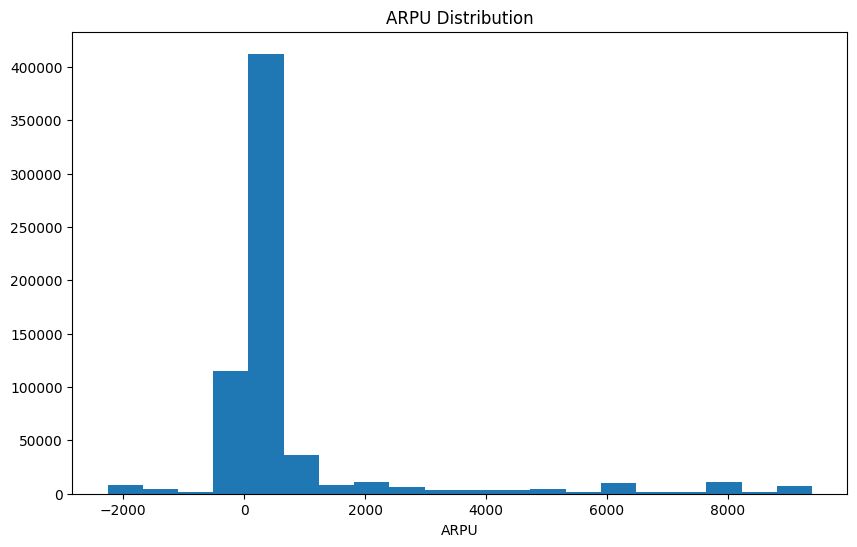

In [ ]:
# Plot
plt.figure(figsize=(10,6))
plt.hist(df['arpu'], bins=20)
plt.title('ARPU Distribution')
plt.xlabel('ARPU')
plt.show()

**Observation**:

* The distribution of ARPU values is right-skewed, with most values concentrated below 500 which indicates very high ARPU values for a few customers proving our hypotheses.

* There are some negative ARPU values, which may be due to refunds. A negative ARPU means that the company is losing money on a per-user basis, rather than making a profit. It is not uncommon for telecom companies to have negative ARPU due to the high costs associated with acquiring and servicing customers.



In [ ]:
# ARPU is negative here.
# Lets investigate
df.arpu.describe()

count    653753.000000
mean        781.196280
std        1807.269437
min       -2258.680000
25%         118.940000
50%         348.540000
75%         580.650000
max        9394.500000
Name: arpu, dtype: float64

In [ ]:
# Now let us investigate how many people have negative arpu

df[df['arpu']<0].shape

(115942, 76)

In [ ]:
# Let's calculate the percentage
115942/df.shape[0]

0.17734832574382067

**Univarite Data Analysis Observation**:

The fact that 17% of the people have negative arpu means that a significant proportion of the customer base is not generating revenue for the telecom company.

This could be due to a number of reasons, such as inactive accounts, delinquent accounts, or accounts with outstanding balances.

To understand more about this issue, we can investigate other variables that may be related to negative arpu, such as churn status. We can also look at the distribution of negative arpu values across different demographic groups, such as age, gender, and location, to see if there are any patterns or trends.

Additionally, we can explore whether there are any correlations between negative arpu and other variables, such as usage patterns, service subscriptions, and customer satisfaction scores to understand what's causing this behaviour.

Overall, further investigation is needed to fully understand the implications of negative arpu for the telecom company.


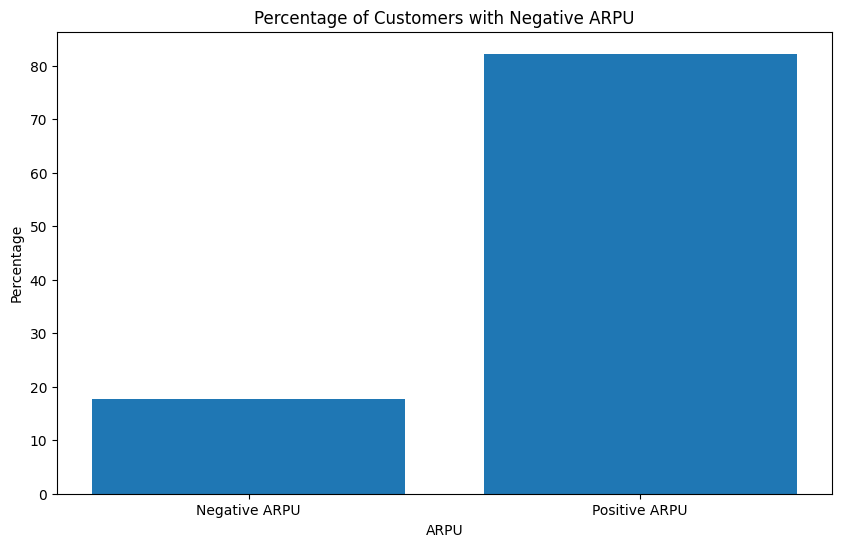

In [ ]:
# calculate the percentage of customers with negative ARPU
negative_arpu_percentage = (df[df['arpu'] < 0]['arpu'].count() / df.shape[0]) * 100

# create a bar plot to visualize the negative ARPU percentage
plt.figure(figsize=(10,6))
plt.bar(['Negative ARPU', 'Positive ARPU'], [negative_arpu_percentage, 100 - negative_arpu_percentage])
plt.title('Percentage of Customers with Negative ARPU')
plt.xlabel('ARPU')
plt.ylabel('Percentage')
plt.show()

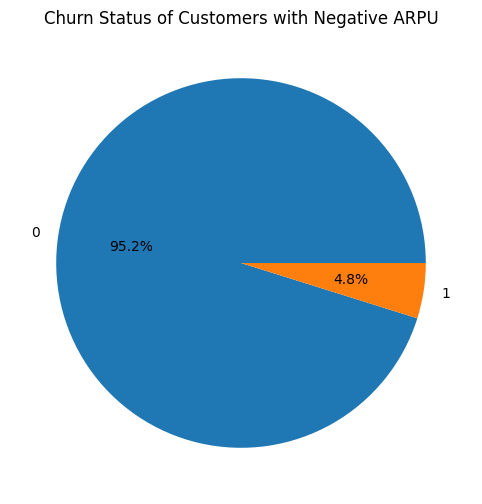

In [ ]:
# the relationship between negative ARPU and churn status
churn_negative_arpu = df[df['arpu'] < 0]['Churn Value'].value_counts(normalize=True)

# create a pie chart to visualize the churn status of customers with negative ARPU
plt.figure(figsize=(10,6))
plt.pie(churn_negative_arpu, labels=churn_negative_arpu.index, autopct='%1.1f%%')
plt.title('Churn Status of Customers with Negative ARPU')
plt.show()

**Observation**:

* 95.2% of customers with negative ARPU did not churn, while only 4.8% of customers with negative ARPU churned.

* This suggests that having negative ARPU is not necessarily a strong predictor of churn. However, further analysis is needed to fully understand the relationship between negative ARPU and churn. Other factors, such as usage patterns, service subscriptions, and customer satisfaction, may also play a role in predicting churn.

* It's possible that the negative ARPU is a result of money spent by the company to retain customers but negative ARPU could also be a result of other factors, such as accounts that have been inactive for a long time or delinquent accounts with outstanding balances.

* Additionally, the 4.8% of customers with negative ARPU who churned may have done so for reasons such as finding a better deal elsewhere.

In [ ]:
# Lets analyze further

negative_arpu_churn = df[(df['arpu'] < 0) & (df['Churn Value'] == 1)]

print("Number of customers with negative ARPU who churned: ", len(negative_arpu_churn['Customer ID']))


Number of customers with negative ARPU who churned:  5610


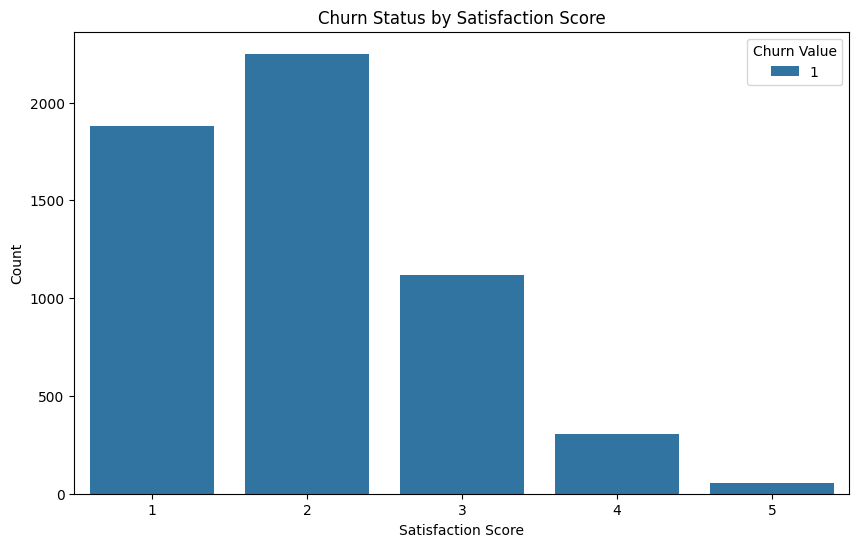

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.countplot(x='Satisfaction Score', hue='Churn Value', data=negative_arpu_churn)

# Title and label
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.title('Churn Status by Satisfaction Score')
plt.show()

In [ ]:
# Define the variables to loop over (premium and other important variables which can have an impact on ARPU as per hypotheses)

services = ['Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support',
            'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

In [ ]:
# Encode data
mapping_dict = {'Yes': 1, 'No': 0}
for column in services:
    # replace 'Yes' and 'No' with 1 and 0
    df[column] = df[column].replace(mapping_dict)


In [ ]:
# checking data types
df[services].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653753 entries, 0 to 653752
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Internet Service        653753 non-null  int64 
 1   Online Security         653753 non-null  int64 
 2   Online Backup           653753 non-null  int64 
 3   Device Protection Plan  653753 non-null  int64 
 4   Premium Tech Support    653753 non-null  int64 
 5   Streaming TV            653753 non-null  int64 
 6   Streaming Movies        653753 non-null  int64 
 7   Streaming Music         653753 non-null  int64 
 8   Unlimited Data          653753 non-null  object
dtypes: int64(8), object(1)
memory usage: 44.9+ MB


Unlimited data should be in int data type

In [ ]:
# Lets check the value counts
df['Unlimited Data'].value_counts()

1       352341
0       290309
None     11103
Name: Unlimited Data, dtype: int64

In [ ]:
# replace None and change data type
df['Unlimited Data'] = df['Unlimited Data'].replace("None", 0).astype('int64')

In [ ]:
# Number of services a person uses
df['num_services'] = df[services].sum(axis=1)

In [ ]:
# Verify
df.head(1)

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,outgoing_call_usage,data_usage,total_arpu,Tenure,num_services
0,hthjctifkiudi0,1,1.0,71638,Female,36.0,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.32,30.97,5.71,1.79,25.71,175.56,0.47,0.0,5.11,0.65,13.99,121.51,168.4,67.61,115.69,52.22,18.71,0.0,0.26,11.53,46.42,18.0,0.0,38.3,219.25,0.0,0.0,214.99,1,Yes,9.0,Yes,Yes,1,DSL,27,0,0,1,1,0,1,1,1,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,18.0,A,617.08,284.55,273.07,1.0,6


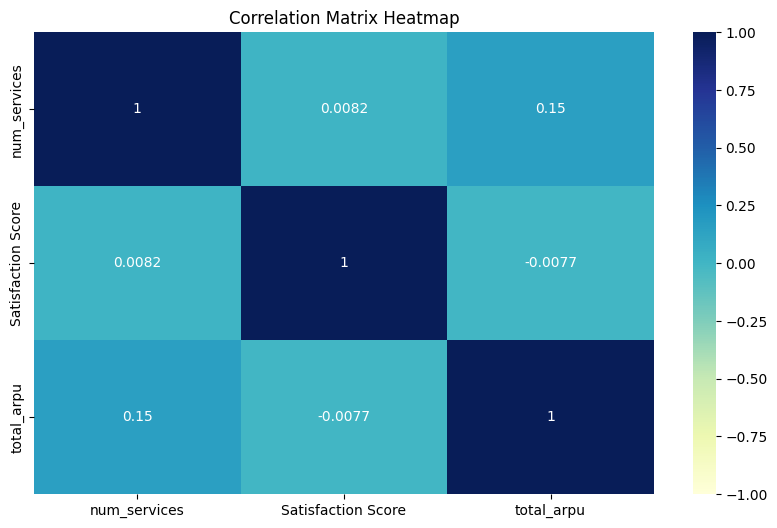

In [ ]:
# Test correlation between number of services and satisfaction score to ARPU
correlation = df[['num_services', 'Satisfaction Score', 'total_arpu']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation, cmap="YlGnBu", annot=True, vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Observations and Insights**

Based on the correlation coefficients, there seems to be a weak negative correlation between satisfaction score and ARPU (-0.0081), implying that higher ARPU customers might not necessarily have higher satisfaction scores. On the other hand, there is a weak positive correlation between the number of services used and ARPU (0.16), indicating that customers using more services may have higher ARPU. This proves our hypothesis that number of services is positively correlated to ARPU but rejects the hypothesis that high ARPU customers are satisfied.

* Satisfaction Score: The company should not assume that higher-paying customers are more satisfied with their services. It is important to focus on improving customer satisfaction across all customer segments, regardless of their ARPU.

* Number of Services Used: The positive correlation between the number of services used and ARPU suggests that the company can increase their revenue by encouraging customers to use more services. The company could offer bundled services or promotions to incentivize customers to use more services.

#### **T-Tests**

In [ ]:
# Loop over the variables and perform t-tests
preserve("fcTel4")
for var in services:
    group1 = df[df[var]==1]['arpu']
    group0 = df[df[var]==0]['arpu']
    t, p = ttest_ind(group1, group0, equal_var=False)
    if group1.mean() > group0.mean():
        print('Variable:', var)
        print('Group 1 Mean ARPU:', group1.mean())
        print('Group 0 Mean ARPU:', group0.mean())
        print('Higher weightage in Group 1')
        print('T-Statistic:', t)
        print('P-Value:', p, (p < 0.05))
        print('-----------------------')
    else:
        print('Variable:', var)
        print('Group 1 Mean ARPU:', group1.mean())
        print('Group 0 Mean ARPU:', group0.mean())
        print('Higher weightage in Group 0')
        print('T-Statistic:', t)
        print('P-Value:', p, (p<0.05))
        print('-----------------------')

<IPython.core.display.Javascript object>

Variable: Internet Service
Group 1 Mean ARPU: 780.1507871374382
Group 0 Mean ARPU: 782.8323135470201
Higher weightage in Group 0
T-Statistic: -0.5849065656666134
P-Value: 0.5586107869078516 False
-----------------------
Variable: Online Security
Group 1 Mean ARPU: 784.0445228155231
Group 0 Mean ARPU: 780.7468038615277
Higher weightage in Group 1
T-Statistic: 0.506349585745111
P-Value: 0.612612197139793 False
-----------------------
Variable: Online Backup
Group 1 Mean ARPU: 783.0423254245743
Group 0 Mean ARPU: 780.2821661459787
Higher weightage in Group 1
T-Statistic: 0.5807817078583458
P-Value: 0.5613878886892029 False
-----------------------
Variable: Device Protection Plan
Group 1 Mean ARPU: 785.3021311329582
Group 0 Mean ARPU: 777.1122647582899
Higher weightage in Group 1
T-Statistic: 1.8319811981788083
P-Value: 0.06695467663042813 False
-----------------------
Variable: Premium Tech Support
Group 1 Mean ARPU: 782.08167396498
Group 0 Mean ARPU: 780.8904378213067
Higher weightage in

All t-tests on the services with ARPU resulted in false significance, it means that there is no statistically **significant** difference in ARPU between customers who use a particular service and those who do not. This implies that offering or not offering a particular service does not have a significant impact on ARPU.

**Note on  Significance Levels**

If you increase the significance level, such as to 0.10, you are allowing for a greater probability of rejecting the null hypothesis when it is actually true. This means that you are more likely to detect a significant difference between the means of the variables being tested, but it also increases the risk of making a Type I error (rejecting the null hypothesis when it is actually true).

<Figure size 1000x600 with 0 Axes>

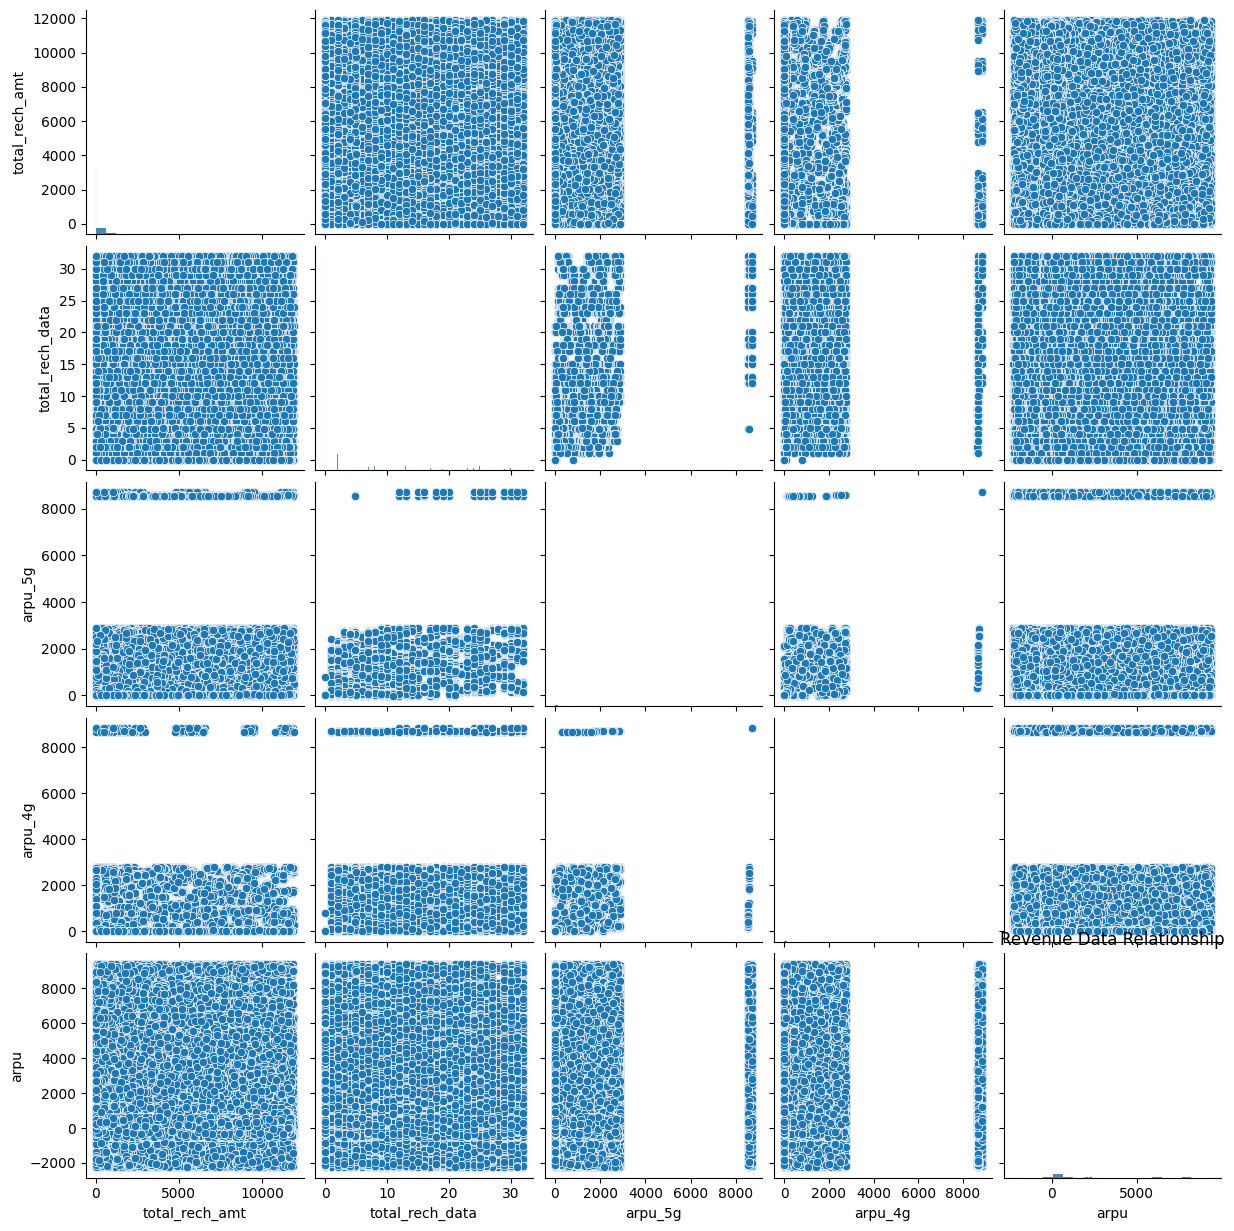

In [ ]:
# Plot
plt.figure(figsize=(10,6))
sns.pairplot(df[['total_rech_amt', 'total_rech_data', 'arpu_5g', 'arpu_4g', 'arpu']])
plt.title('Revenue Data Relationship')
plt.show()

**Observations**:

Based on the pairplot, we can observe that there is a positive correlation between the total recharge amount and ARPU, as well as between the total recharge data and ARPU. This indicates that customers who recharge more frequently and with larger amounts may have higher ARPU.



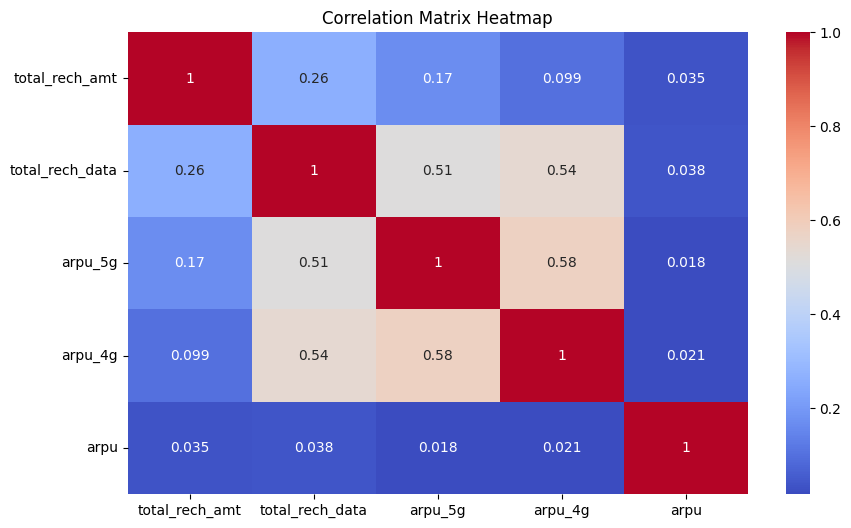

In [ ]:
# Plot a correlation heatmap
plt.figure(figsize=(10,6))
corr_matrix = df[['total_rech_amt', 'total_rech_data', 'arpu_5g', 'arpu_4g', 'arpu']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

**Observations**:

* Total recharge amount and total recharge data have a positive correlation of 0.26, indicating that customers who recharge more tend to use more data.

* Total recharge amount and ARPU have a weak positive correlation of 0.035, suggesting that customers who recharge more may have higher ARPU, but the relationship is not very strong.

* Total recharge data and ARPU have a very weak positive correlation of 0.038, indicating that there may be a slight relationship between data usage and ARPU, but it is not significant.

* ARPU 5G and ARPU 4G have a moderate positive correlation of 0.578, indicating that customers who use 5G and 4G services tend to have similar ARPU levels.

* ARPU 5G and total recharge data have a moderate positive correlation of 0.512, indicating that customers who use 5G services tend to use more data.

* ARPU 4G and total recharge data also have a moderate positive correlation of 0.541, suggesting that customers who use 4G services tend to use more data.

The correlation matrix suggests that there may be some relationships between total recharge amount, total recharge data, and ARPU, but the relationships are not very strong.







### **Customer Lifetime Hypotheses**



* **Customers who use more data (4G and 5G) have a higher lifetime value.**

* **Customers who have a higher satisfaction score are more likely to have a longer lifetime with the company.**


* **Customers who have referred a friend are more likely to have a longer lifetime with the company.**

* **Customers who have unlimited data plans are more likely to have a longer lifetime with the company.**

* **Customers who use more streaming services (e.g. TV, movies, music) have a higher lifetime value.**

* **Customers who have a higher average revenue per user are more likely to have a longer lifetime with the company.**

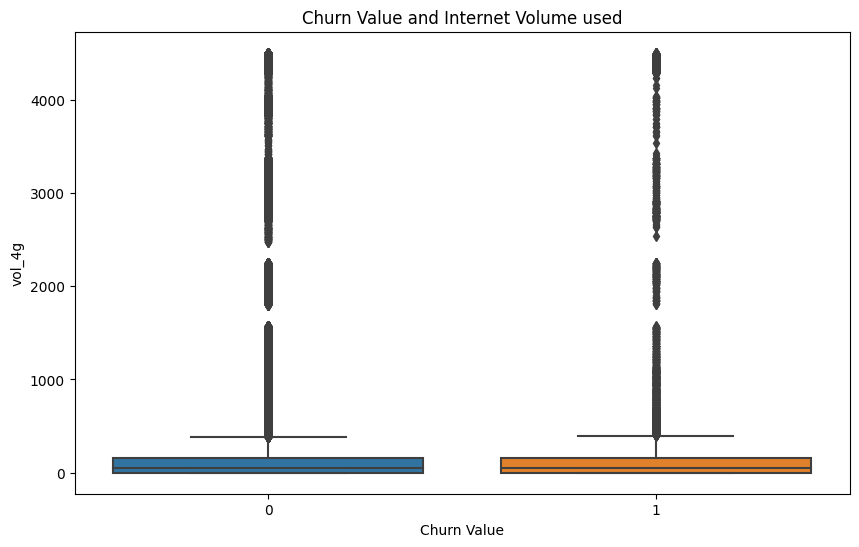

In [ ]:
# Customers who use more data are less likely to churn.
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn Value', y='vol_4g', data=df)
plt.title("Churn Value and Internet Volume used")
plt.show()

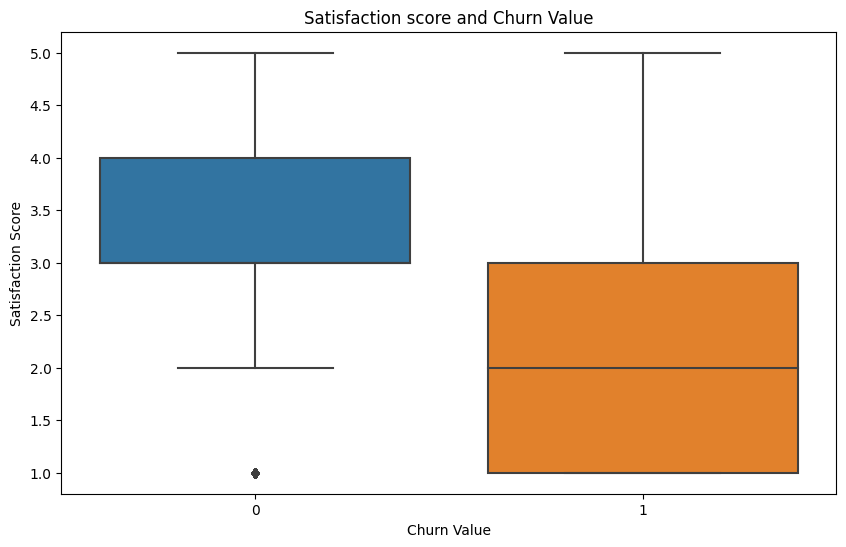

In [ ]:
# Customers who have a higher satisfaction score are less likely to churn.
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn Value', y='Satisfaction Score', data=df)
plt.title("Satisfaction score and Churn Value")
plt.show()

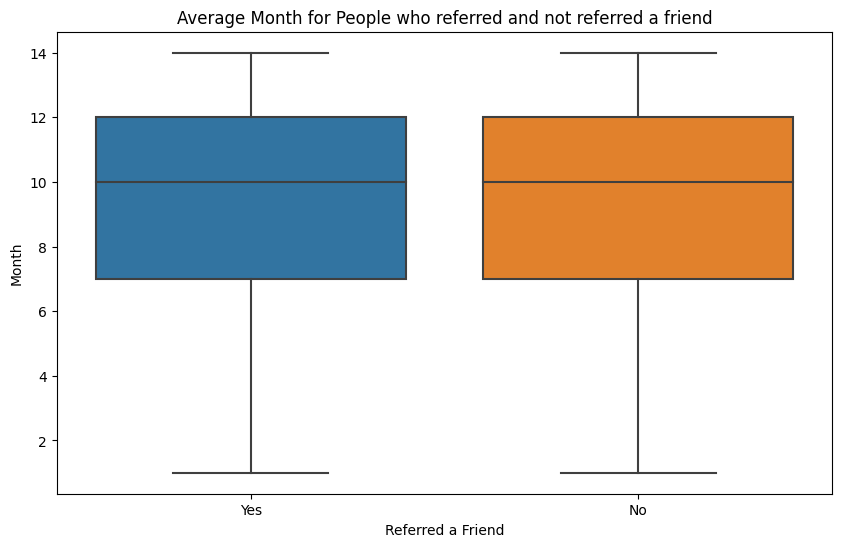

In [ ]:
# Customers who have referred a friend are more likely to have a longer lifetime.
plt.figure(figsize=(10,6))
sns.boxplot(x='Referred a Friend', y='Month', data=df)
plt.title("Average Month for People who referred and not referred a friend")
plt.show()

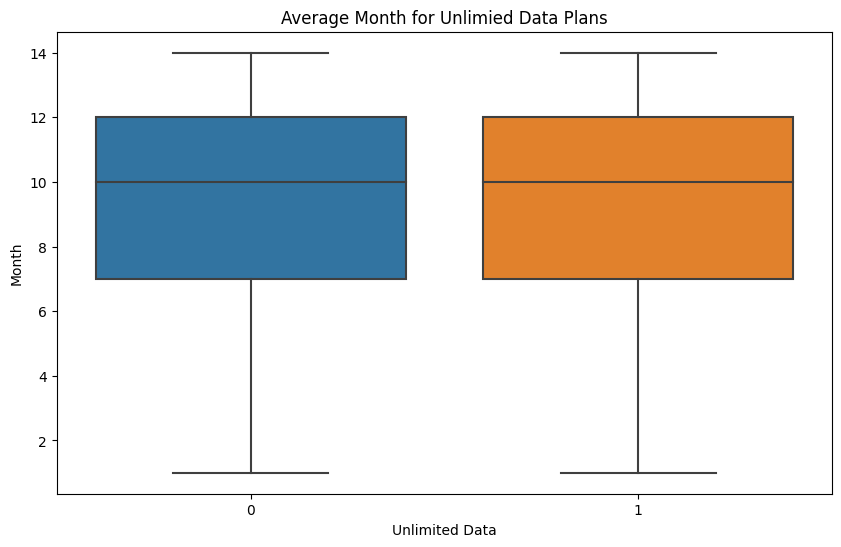

In [ ]:
# Customers who have unlimited data plans are more likely to have a longer lifetime.
plt.figure(figsize=(10,6))
sns.boxplot(x='Unlimited Data', y='Month', data=df)
plt.title("Average Month for Unlimied Data Plans")
plt.show()

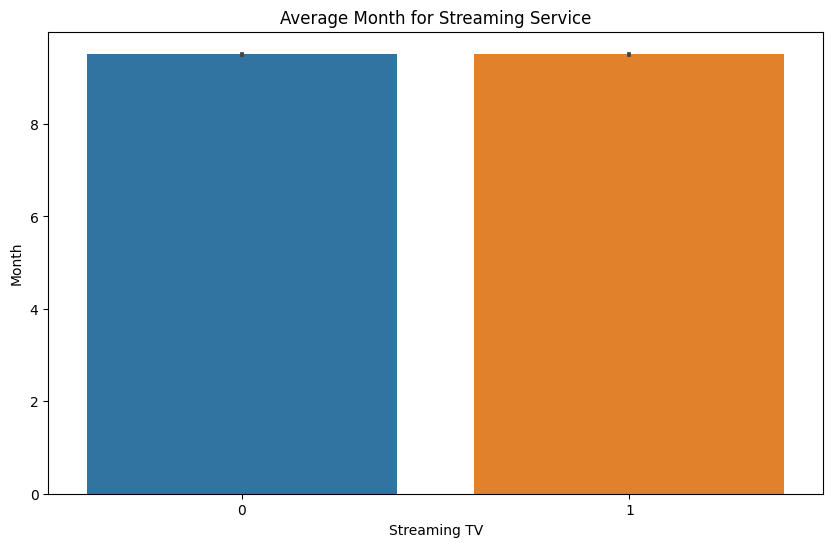

In [ ]:
# Customers who use more streaming services have a higher lifetime value.
plt.figure(figsize=(10,6))
sns.barplot(x='Streaming TV', y='Month', data=df)
plt.title("Average Month for Streaming Service")
plt.show()

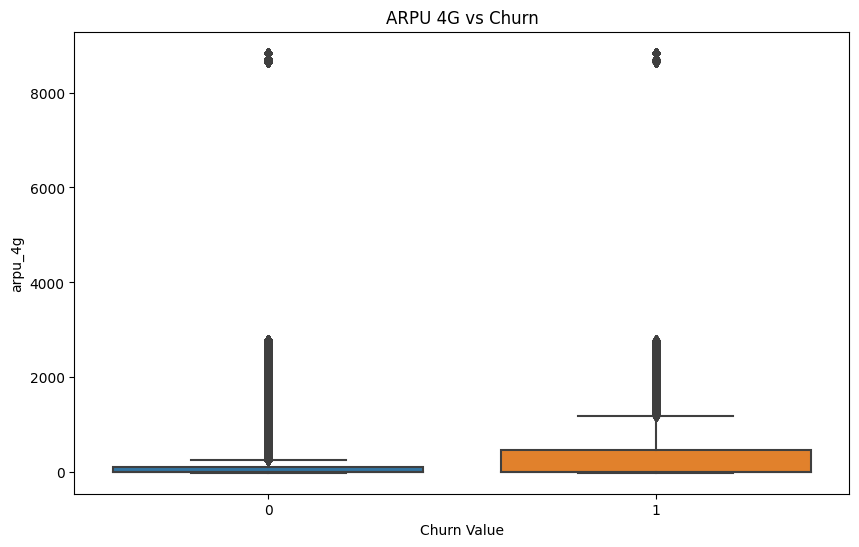

In [ ]:
# Box plot for ARPU 4G against churn
plt.figure(figsize=(10,6))
sns.boxplot(x='Churn Value', y='arpu_4g', data=df)
plt.title('ARPU 4G vs Churn')
plt.show()

**Observations**:

* Churned customers generally have lower satisfaction scores compared to non-churned customers, indicating that dissatisfaction may be a driving factor behind customer churn.

* The average ARPU (average revenue per user) for 4G services is higher for churned customers than for non-churned customers. This suggests that customers who generate higher revenue may still be at risk of churning, possibly due to issues with the quality of 4G service or customer support.

* It would be worth exploring other factors that may contribute to dissatisfaction , such as network coverage, pricing, customer service, and promotions. By addressing these issues, the company may be able to reduce churn rates and improve customer retention.

The historical approach can be used to calculate CLTV and use it for different perspectives such as revenue, customer churn, loyalty, and retention.  This can help companies make informed decisions on how to allocate resources and target specific customer segments to maximize their profits and minimize their churn rate.

In [ ]:
# group by Month of Joining to get new customers for each month
new_customers = df.groupby('Month of Joining')['Customer ID'].nunique().reset_index()
new_customers = new_customers.rename(columns={'Customer ID': 'New Customers'})

In [ ]:
# let's take only one year of data
new_customers

,Month of Joining,New Customers
0,1.0,6252
1,2.0,10610
2,3.0,7460
3,4.0,5064
4,5.0,4606
5,6.0,15962
6,7.0,8965
7,8.0,10229
8,9.0,11716
9,10.0,8484


In [ ]:
# Filter churned and get monthly loss of customers
churned_customers = df[df['Churn Value'] == 1]

lost_customers_by_month = churned_customers.groupby('Month')['Churn Value'].count()
lost_customers_by_month

Month
1     2278
2     2416
3     2912
4     1522
5     1560
6     2005
7      866
8     1937
9     2452
10    3033
11    3263
12    1675
13    2741
14    1205
Name: Churn Value, dtype: int64

In [ ]:
# Calculating the dynamic churn rates
dynamic_churn_rates = new_customers.merge(lost_customers_by_month, left_on="Month of Joining", right_on="Month").rename({"Churn Value": "Lost Customers"}, axis=1)
dynamic_churn_rates

,Month of Joining,New Customers,Lost Customers
0,1.0,6252,2278
1,2.0,10610,2416
2,3.0,7460,2912
3,4.0,5064,1522
4,5.0,4606,1560
5,6.0,15962,2005
6,7.0,8965,866
7,8.0,10229,1937
8,9.0,11716,2452
9,10.0,8484,3033


In [ ]:
# Add a new column for Total Customers
dynamic_churn_rates['Total Customers'] = dynamic_churn_rates['New Customers'].cumsum() - dynamic_churn_rates['Lost Customers'].cumsum().shift(fill_value=0)

# Add a new column for Churn Rate
dynamic_churn_rates['Churn Rate'] = dynamic_churn_rates['Lost Customers'] / dynamic_churn_rates['Total Customers']

In [ ]:
# Rename
dynamic_churn_rates = dynamic_churn_rates.rename({"Month of Joining":"Month"}, axis=1)
dynamic_churn_rates

,Month,New Customers,Lost Customers,Total Customers,Churn Rate
0,1.0,6252,2278,6252,0.364363
1,2.0,10610,2416,14584,0.165661
2,3.0,7460,2912,19628,0.148359
3,4.0,5064,1522,21780,0.069881
4,5.0,4606,1560,24864,0.062741
5,6.0,15962,2005,39266,0.051062
6,7.0,8965,866,46226,0.018734
7,8.0,10229,1937,55589,0.034845
8,9.0,11716,2452,65368,0.037511
9,10.0,8484,3033,71400,0.042479


In [ ]:
# Merge monthly churn rate to the original data
df = pd.merge(df, dynamic_churn_rates[['Month', 'Churn Rate']], on='Month')


In [ ]:
# View rows
df.head(3)

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,outgoing_call_usage,data_usage,total_arpu,Tenure,num_services,Churn Rate
0,hthjctifkiudi0,1,1.0,71638,Female,36.0,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.320000,30.97,5.710000,1.79,25.71,175.56,0.47,0.0,5.11,0.650000,13.99,121.51,168.40,67.61,115.690000,52.22,18.71,0.0,0.26,11.530000,46.42,18.0,0.0,38.30,219.25,0.0,0.0,214.99,1,Yes,9.0,Yes,Yes,1,DSL,27,0,0,1,1,0,1,1,1,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,18.0,A,617.080000,284.55,273.07,1.0,6,0.364363
1,tqhiqgvbbhley51,1,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,401.95,1132.10,23.78,2019.893046,2943.27,79.125279,12.17,18.79,1122.93,111.05,0.0,29.35,234.622548,292.55,3481.72,2303.09,469.87,860.779861,1593.80,400.21,0.0,0.02,643.472745,46.26,7073.0,0.0,0.00,0.00,63.0,0.0,0.00,0,No,0.0,Yes,No,0,Not Applicable,64,0,0,0,1,1,0,0,0,Bank Withdrawal,pnfzkmmgtfgiyhb85641,1,Not Applicable,Not Applicable,7073.0,B,6875.360874,64.00,464.95,1.0,2,0.364363
2,dvezrgwvxoslg150,1,1.0,88230,Not Specified,59.0,No,No,1.0,rhriglxohyhj150,hgnfxdvhlqlwbqukrr150,NM,Chaves County,America/Denver,575.0,US,33.19,-104.36,378.91,51.67,119.03,294.960000,78.96,2.240000,13.87,104.84,268.90,0.14,0.0,41.16,3.260000,0.79,159.70,64.25,31.05,93.110000,2.59,7.93,0.0,0.03,58.230000,20.39,54.0,0.0,63.52,317.79,0.0,0.0,307.76,1,No,0.0,Yes,No,1,None,0,0,1,0,0,0,0,0,1,Credit Card,plkbcgilmqdwqro69121,2,Dissatisfaction,Product dissatisfaction,54.0,C,914.280000,381.31,378.91,1.0,3,0.364363


Now let's calculate CLTV based on total ARPU.

In [ ]:
# CLTV calculation
df['CLTV_total_arpu'] = (df['total_arpu']*0.1)* (1/df['Churn Rate'])

In [ ]:
# View
df.head(3)

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,outgoing_call_usage,data_usage,total_arpu,Tenure,num_services,Churn Rate,CLTV_total_arpu
0,hthjctifkiudi0,1,1.0,71638,Female,36.0,No,No,0.0,jeavwsrtakgq0,bfbrnsqreveeuafgps0,AR,Chicot County,America/Chicago,870.0,US,33.52,-91.43,273.07,18.88,78.59,280.320000,30.97,5.710000,1.79,25.71,175.56,0.47,0.0,5.11,0.650000,13.99,121.51,168.40,67.61,115.690000,52.22,18.71,0.0,0.26,11.530000,46.42,18.0,0.0,38.30,219.25,0.0,0.0,214.99,1,Yes,9.0,Yes,Yes,1,DSL,27,0,0,1,1,0,1,1,1,Credit Card,vvhwtmkbxtvsppd52013,3,Competitor,Competitor offered higher download speeds,18.0,A,617.080000,284.55,273.07,1.0,6,0.364363,74.944409
1,tqhiqgvbbhley51,1,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,401.95,1132.10,23.78,2019.893046,2943.27,79.125279,12.17,18.79,1122.93,111.05,0.0,29.35,234.622548,292.55,3481.72,2303.09,469.87,860.779861,1593.80,400.21,0.0,0.02,643.472745,46.26,7073.0,0.0,0.00,0.00,63.0,0.0,0.00,0,No,0.0,Yes,No,0,Not Applicable,64,0,0,0,1,1,0,0,0,Bank Withdrawal,pnfzkmmgtfgiyhb85641,1,Not Applicable,Not Applicable,7073.0,B,6875.360874,64.00,464.95,1.0,2,0.364363,127.606119
2,dvezrgwvxoslg150,1,1.0,88230,Not Specified,59.0,No,No,1.0,rhriglxohyhj150,hgnfxdvhlqlwbqukrr150,NM,Chaves County,America/Denver,575.0,US,33.19,-104.36,378.91,51.67,119.03,294.960000,78.96,2.240000,13.87,104.84,268.90,0.14,0.0,41.16,3.260000,0.79,159.70,64.25,31.05,93.110000,2.59,7.93,0.0,0.03,58.230000,20.39,54.0,0.0,63.52,317.79,0.0,0.0,307.76,1,No,0.0,Yes,No,1,None,0,0,1,0,0,0,0,0,1,Credit Card,plkbcgilmqdwqro69121,2,Dissatisfaction,Product dissatisfaction,54.0,C,914.280000,381.31,378.91,1.0,3,0.364363,103.992332


In [ ]:
# Lets calculate the max tenure of each customer
max_tenure = df.groupby('Customer ID')['Tenure'].max().reset_index()
max_tenure

,Customer ID,Tenure
0,aaabuvfyemtjj82040,1.0
1,aaamjcrckmkor19758,6.0
2,aaarmkekydoyp67068,7.0
3,aaazpyyafsdxp85262,2.0
4,aabakestdecft46766,1.0
...,...,...
98225,zzzdxcssycihg147958,3.0
98226,zzzhmvfzxlfut88113,7.0
98227,zzzkqzcxfkqgz125167,7.0
98228,zzzsamaczmpqj3670,5.0


In the telecom industry, customers frequently switch between service providers, so it is important to identify and categorize them based on their usage behavior and retention potential.

Creating flag columns for completed_6_months, churned_within_6_months, and not_completed_6_months is proper customer segmentation.

By creating these flag columns, we can easily filter and segment customers based on their status, which helps in targeted marketing, understanding churn behavior, and predicting CLTV.

In [ ]:
# Creating completed 6 months column and encoding them where max tenure is > 6
max_tenure.loc[max_tenure['Tenure'] >= 6, 'completed_6_months'] = 1

In [ ]:
def create_flags(df):
    # Initialize flags to zero
    df['completed_6_months'] = 0
    df['churned_within_6_months'] = 0
    df['not_completed_6_months'] = 0

    # Find customers who have completed at least 6 months
    max_tenure = df.groupby('Customer ID')['Tenure'].max().reset_index()
    completed_ids = max_tenure.loc[max_tenure['Tenure'] >= 6, 'Customer ID']
    df.loc[df['Customer ID'].isin(completed_ids), 'completed_6_months'] = 1

    churned_ids = df.loc[(df['Churn Value'] == 1) & (df['Month'] == df.groupby('Customer ID')['Month'].transform('max')), 'Customer ID']
    # group by customer ID and find the maximum tenure
    max_tenure = df.groupby('Customer ID')['Tenure'].max().reset_index()

    # filter again to include only the rows where the maximum tenure is less than 6
    filtered_max_tenure = max_tenure[max_tenure['Tenure'] < 6]
    customer_ids_filtered = filtered_max_tenure['Customer ID'].tolist()
    df.loc[df['Customer ID'].isin(customer_ids_filtered), 'churned_within_6_months'] = 1

    # Find customers who have not completed 6 months and have not churned
    not_completed_ids = df.groupby('Customer ID')['Tenure'].count().reset_index()
    not_completed_ids = not_completed_ids.loc[(not_completed_ids['Tenure'] < 6) & (~not_completed_ids['Customer ID'].isin(churned_ids)), 'Customer ID']
    df.loc[df['Customer ID'].isin(not_completed_ids), 'not_completed_6_months'] = 1

    return df


In [ ]:
# create flags
df = create_flags(df)

In [ ]:
# Verify
df[df['Customer ID'] == "tqhiqgvbbhley51"]

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,outgoing_call_usage,data_usage,total_arpu,Tenure,num_services,Churn Rate,CLTV_total_arpu,completed_6_months,churned_within_6_months,not_completed_6_months
1,tqhiqgvbbhley51,1,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,401.95,1132.100000,23.78,2019.893046,2943.270000,79.125279,12.17,18.79,1122.93,111.050000,0.0,29.35,234.622548,292.550000,3481.72,2303.090000,469.87,860.779861,1593.800000,400.21,0.0,0.02,643.472745,46.26,7073.0,0.0,0.00,0.00,63.00,0.00,0.00,0,No,0.0,Yes,No,0,Not Applicable,64,0,0,0,1,1,0,0,0,Bank Withdrawal,pnfzkmmgtfgiyhb85641,1,Not Applicable,Not Applicable,7073.0,B,6875.360874,64.00,464.95,1.0,2,0.364363,127.606119,0,1,0
431020,tqhiqgvbbhley51,2,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,3494.77,1265.560000,549.44,6001.890000,2595.623151,14.140000,252.98,7341.67,5007.49,139.837265,0.0,214.14,19.690000,391.162815,1431.50,1669.759625,457.05,814.210000,580.859829,152.33,0.0,1.30,481.556391,399.64,291.0,0.0,0.00,0.00,0.00,0.00,0.00,0,No,0.0,Yes,No,0,Not Applicable,77,0,1,0,0,1,1,1,0,Bank Withdrawal,tkrvsngmmntne88689,4,Not Applicable,Not Applicable,291.0,No Offer,957.820000,77.00,3494.77,2.0,4,0.165661,2109.591295,0,1,0
445604,tqhiqgvbbhley51,3,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,417.72,91.952452,75.60,238.400000,1051.380000,0.790000,15.98,237.40,7.02,6.620000,0.0,37.57,46.580000,2.730000,1.91,328.860000,15.12,85.420000,26.990000,12.94,0.0,0.01,4.910000,53.61,605.0,18.0,10.61,13222.77,1129.16,2601.66,81.97,0,Yes,3.0,Yes,No,1,Fiber Optic,0,0,0,1,0,0,0,0,1,Bank Withdrawal,mmeqlzplodfzj36241,3,Not Applicable,Not Applicable,623.0,No Offer,1704.090000,308.98,4148.54,3.0,3,0.148359,2796.275519,0,1,0
465233,tqhiqgvbbhley51,4,1.0,87654,Female,50.0,Not Specified,Yes,0.0,djiohnxgigdy51,sdwmmtmwlsmkzykvnq51,NM,Unknown,America/Denver,Unknown,US,32.99,-106.97,458.10,64.770000,67.20,248.100000,134.460000,2.050000,5.88,497.49,108.95,3.880000,0.0,35.00,0.060000,20.430000,76.22,43.680000,49.94,104.510000,47.120000,10.29,0.0,0.03,101.080000,12.01,310.0,0.0,0.00,0.00,0.00,0.00,0.00,1,Yes,11.0,Yes,None,0,Not Applicable,57,0,1,1,1,1,1,1,0,Bank Withdrawal,omrkedepimhn101813,1,Price,Price too high,310.0,No Offer,1117.620000,57.00,458.10,4.0,6,0.069881,655.546518,0,1,0


In [ ]:
# Let's verify, completed 6 months
df[df['Customer ID']=='aaamjcrckmkor19758']

,Customer ID,Month,Month of Joining,zip_code,Gender,Age,Married,Dependents,Number of Dependents,Location ID,Service ID,state,county,timezone,area_codes,country,latitude,longitude,arpu,roam_ic,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,loc_og_t2c,std_og_t2t,std_og_t2m,std_og_t2f,std_og_t2c,isd_og,spl_og,og_others,loc_ic_t2t,loc_ic_t2m,loc_ic_t2f,std_ic_t2t,std_ic_t2m,std_ic_t2f,std_ic_t2o,spl_ic,isd_ic,ic_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,aug_vbc_5g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Status ID,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,outgoing_call_usage,data_usage,total_arpu,Tenure,num_services,Churn Rate,CLTV_total_arpu,completed_6_months,churned_within_6_months,not_completed_6_months
51008,aaamjcrckmkor19758,7,7.0,94061,Male,33.0,Not Specified,Yes,0.0,miabsgelvyeh19758,zkbyxrndavwqlyjqvk19758,CA,San Mateo County,America/Los_Angeles,650.0,US,37.46,-122.24,692.77,44.130000,125.840000,128.630000,116.700000,2.140000,10.88,116.04000,154.370000,8.10,0.0,6.83,29.610000,9.480000,181.620000,88.36,33.26,3.050000,65.34,26.62,0.0,0.040000,36.710000,3.69,160.0,0.0,0.00,0.00,0.00,0.00,0.00,0,Yes,3.0,Yes,Yes,0,Not Applicable,15,0,0,1,1,0,1,1,0,Credit Card,yeiuepokoykzw45193,1,Not Applicable,Not Applicable,160.0,G,697.740000,15.00,692.77,1.0,4,0.018734,3697.919864,1,0,0
98430,aaamjcrckmkor19758,8,7.0,94061,Male,33.0,Not Specified,Yes,0.0,miabsgelvyeh19758,zkbyxrndavwqlyjqvk19758,CA,San Mateo County,America/Los_Angeles,650.0,US,37.46,-122.24,407.62,528.597446,64.030000,150.700000,42.270000,10.920000,15.19,251.35000,31.000000,1.28,0.0,6.51,36.930000,470.750000,1258.920000,1043.17,595.85,88.450000,930.96,470.29,0.0,0.090000,18.420000,24.72,10774.0,0.0,0.00,0.00,0.00,0.00,0.00,0,Yes,1.0,Yes,No,0,Not Applicable,13,0,0,1,0,0,0,0,0,Bank Withdrawal,gawzikhfliul59390,4,Not Applicable,Not Applicable,10774.0,No Offer,1065.740000,13.00,407.62,2.0,1,0.034845,1169.808373,1,0,0
155181,aaamjcrckmkor19758,9,7.0,94061,Male,33.0,Not Specified,Yes,0.0,miabsgelvyeh19758,zkbyxrndavwqlyjqvk19758,CA,San Mateo County,America/Los_Angeles,650.0,US,37.46,-122.24,200.34,329.520000,168.127969,3.900000,3902.210000,0.640000,6.05,102.76000,82.270000,93.29,0.0,21.68,30.260000,436.900000,648.330000,1952.56,442.08,74.920000,655.50,649.86,0.0,0.010000,24.770000,34.83,1705.0,8.0,26.45,9683.60,1572.16,534.75,2.61,0,Yes,6.0,Yes,Yes,1,DSL,66,0,0,1,0,1,1,1,1,Wallet Balance,rzmhgwzcaxya13249,3,Not Applicable,Not Applicable,1713.0,D,4842.037969,9776.05,2307.25,3.0,6,0.037511,6150.910196,1,0,0
221325,aaamjcrckmkor19758,10,7.0,94061,Male,33.0,Not Specified,Yes,0.0,miabsgelvyeh19758,zkbyxrndavwqlyjqvk19758,CA,San Mateo County,America/Los_Angeles,650.0,US,37.46,-122.24,288.57,85.630000,94.220000,2417.325444,129.990000,122.942216,8.80,88.46000,204.700000,3.77,0.0,26.90,391.704861,51.753209,40.920000,131.02,78.16,284.780000,5.91,33.08,0.0,0.070000,1609.800000,19.09,426.0,0.0,91.88,153.04,0.00,0.00,362.26,0,Yes,4.0,Yes,Yes,1,Cable,69,0,0,0,0,1,0,0,1,Bank Withdrawal,hsrglpqrxeako33104,3,Not Applicable,Not Applicable,426.0,No Offer,3531.765730,313.92,288.57,4.0,3,0.042479,679.324036,1,0,0
292894,aaamjcrckmkor19758,11,7.0,94061,Male,33.0,Not Specified,Yes,0.0,miabsgelvyeh19758,zkbyxrndavwqlyjqvk19758,CA,San Mateo County,America/Los_Angeles,650.0,US,37.46,-122.24,-2162.96,15.930000,141.170000,3328.100000,2099.754906,98.099811,306.91,4355.38339,4668.879416,121.15,0.0,617.38,290.216932,253.990000,1929.591437,755.07,1238.01,1005.411303,342.22,417.13,0.0,0.869464,718.617805,1321.91,2184.0,17.0,2898.98,8201.09,1491.48,2356.64,12.59,0,Yes,4.0,Yes,No,1,Fiber Optic,84,0,0,0,0,1,1,0,1,Bank Withdrawal,jmyyiyogoaqo40131,3,Not Applicable,Not Applicable,2201.0,No Offer,957.820000,308.98,1685.16,5.0,4,0.

### **Usage Patterns and Deviations**

To calculate monthly deviations, we subtract the previous month's usage from the current month's usage. Before calculating deviations, we remove unnecessary columns such as incoming usage since we assume it is free, and we also remove outgoing usage to the call center since it is assumed to be free.

In [ ]:
# lets first remove unnecessary columns
# assume incoming is free
# we will just keep outgoing and data usage, and premium services columns and assume outgoing to call center is free

cols_to_keep = ['Customer ID', 'Month', 'Month of Joining', 'Gender', 'Age', 'Married',
       'Dependents',
       'arpu',  'roam_og', 'loc_og_t2t', 'loc_og_t2m', 'loc_og_t2f',
        'std_og_t2t', 'std_og_t2m', 'std_og_t2f',
       'isd_og', 'spl_og', 'og_others', 'total_rech_amt', 'total_rech_data',
       'vol_4g', 'vol_5g', 'arpu_5g', 'arpu_4g', 'Churn Value',
       'Referred a Friend', 'Number of Referrals', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Streaming Data Consumption', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data',
       'Payment Method', 'Satisfaction Score', 'Churn Category',
       'Churn Reason', 'total_recharge', 'offer', 'Tenure', 'total_arpu',
       'Churn Rate', 'outgoing_call_usage', 'data_usage',
       'CLTV_total_arpu', 'completed_6_months','churned_within_6_months', 'not_completed_6_months']

df = df[cols_to_keep]

In [ ]:
def normalized_col(df_col, req_int_min, req_int_max):
    # find the minimum and maximum values of the input column
    min_col = df_col.min()
    max_col = df_col.max()

    # normalize the column values between req_int_min and req_int_max
    df_norm_col = ((df_col - min_col) / (max_col - min_col) * (req_int_max - req_int_min)) + req_int_min

    # return the normalized column
    return df_norm_col

In [ ]:
# calculate deviation
dev_cols = ['total_recharge', 'outgoing_call_usage', 'data_usage', 'Satisfaction Score']

preserve("fcTel4")
# Calculate the deviation for each column
for col in dev_cols:
    col_name = col + '_dev'
    df[col_name] = df.groupby('Customer ID')[col].diff().fillna(0)

# Normalize the deviation columns between 1 and 10
for col in dev_cols:
    df[col + '_dev'] = normalized_col(df[col + '_dev'], 1, 10)

<IPython.core.display.Javascript object>

In [ ]:
# Head
df.head(3)

,Customer ID,Month,Month of Joining,Gender,Age,Married,Dependents,arpu,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,std_og_t2t,std_og_t2m,std_og_t2f,isd_og,spl_og,og_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,Tenure,total_arpu,Churn Rate,outgoing_call_usage,data_usage,CLTV_total_arpu,completed_6_months,churned_within_6_months,not_completed_6_months,total_recharge_dev,outgoing_call_usage_dev,data_usage_dev,Satisfaction Score_dev
0,hthjctifkiudi0,1,1.0,Female,36.0,No,No,273.07,78.59,280.320000,30.97,5.710000,25.71,175.56,0.47,5.11,0.650000,13.99,18.0,0.0,38.30,219.25,0.0,0.0,1,Yes,9.0,Yes,Yes,1,DSL,27,0,0,1,1,0,1,1,1,Credit Card,3,Competitor,Competitor offered higher download speeds,18.0,A,1.0,273.07,0.364363,617.080000,284.55,74.944409,0,1,0,5.499434,5.500136,5.50013,5.5
1,tqhiqgvbbhley51,1,1.0,Female,50.0,Not Specified,Yes,401.95,23.78,2019.893046,2943.27,79.125279,18.79,1122.93,111.05,29.35,234.622548,292.55,7073.0,0.0,0.00,0.00,63.0,0.0,0,No,0.0,Yes,No,0,Not Applicable,64,0,0,0,1,1,0,0,0,Bank Withdrawal,1,Not Applicable,Not Applicable,7073.0,B,1.0,464.95,0.364363,6875.360874,64.00,127.606119,0,1,0,5.499434,5.500136,5.50013,5.5
2,dvezrgwvxoslg150,1,1.0,Not Specified,59.0,No,No,378.91,119.03,294.960000,78.96,2.240000,104.84,268.90,0.14,41.16,3.260000,0.79,54.0,0.0,63.52,317.79,0.0,0.0,1,No,0.0,Yes,No,1,None,0,0,1,0,0,0,0,0,1,Credit Card,2,Dissatisfaction,Product dissatisfaction,54.0,C,1.0,378.91,0.364363,914.280000,381.31,103.992332,0,1,0,5.499434,5.500136,5.50013,5.5


In [ ]:
# check for any nulls
df.isnull().sum()

Customer ID                     0
Month                           0
Month of Joining                0
Gender                          0
Age                             0
Married                         0
Dependents                      0
arpu                            0
roam_og                         0
loc_og_t2t                      0
loc_og_t2m                      0
loc_og_t2f                      0
std_og_t2t                      0
std_og_t2m                      0
std_og_t2f                      0
isd_og                          0
spl_og                          0
og_others                       0
total_rech_amt                  0
total_rech_data                 0
vol_4g                          0
vol_5g                          0
arpu_5g                         0
arpu_4g                         0
Churn Value                     0
Referred a Friend               0
Number of Referrals           304
Phone Service                   0
Multiple Lines                  0
Internet Servi

We are not significantly using number of referrals.


### **Customer Segments**


The code provided in the next section categorizes customers into four groups: new customers, churned customers, loyal customers, and retained customers. Each group is determined based on a set of rules that take into account a variety of factors such as total recharge amount, outgoing call and data usage, and satisfaction score.

Loyalty Score = (Total Recharge Deviation * w1) + (Usage Deviation * w2) + (Satisfaction Deviation * w3)

Retention Score = (Total Recharge Deviation * w4) + (Usage Deviation * w5) + (Satisfaction Deviation * w6)

Here, w1, w2, w3, w4, w5 and w6 are the weights assigned to each parameter for each segment.


**New Customers**

New customers are those who have not completed six months with the company.

**Churned Customers**

Churned customers are those who have left the company within six months.

**Loyal Customers**

Loyal customers are those who have completed six months with the company.

**Retained Customers**

Retained customers are those who have completed six months with the company.

In [ ]:
# assign weights
customer_weights = { "not_completed_6_months": {"w1": 0.2,"w2": 0.3, "w3": 0.5, "w4": 0.3, "w5": 0.3, "w6": 0.4 },
                     "churned_within_6_months": { "w1": 0, "w2": 0, "w3": 0, "w4": 0.4, "w5": 0.2, "w6": 0.4 },
                     "completed_6_months": { "w1": 0.5,"w2": 0.3,"w3": 0.2, "w4": 0.3,"w5": 0.1,"w6": 0.6}
                     }


In [ ]:
def calculate_scores(weight_dic, total_recharge_dev, usage_dev, satisfaction_score_dev):
    wt1 = weight_dic['w1']
    wt2 = weight_dic['w2']
    wt3 = weight_dic['w3']
    wt4 = weight_dic['w4']
    wt5 = weight_dic['w5']
    wt6 = weight_dic['w6']

    loyalty_score = wt1 * total_recharge_dev + wt2 * usage_dev + wt3 * satisfaction_score_dev
    retention_score = wt4 * total_recharge_dev + wt5 * usage_dev + wt6 * satisfaction_score_dev

    return loyalty_score, retention_score


def get_customer_category(row):

    # Extract feature values
    total_recharge_dev = row['total_recharge_dev']
    outgoing_call_usage_dev = row['outgoing_call_usage_dev']
    data_usage_dev = row['data_usage_dev']
    satisfaction_score_dev = row['Satisfaction Score_dev']

    usage_dev = (outgoing_call_usage_dev + data_usage_dev)/2
    # Define loyalty and retention weights


    # Categorize new customers
    if row['not_completed_6_months'] == 1:

        loyalty_score, retention_score = calculate_scores(customer_weights['not_completed_6_months'], total_recharge_dev, usage_dev, satisfaction_score_dev)
        return 'new_customer', loyalty_score, retention_score

    # Categorize churned customers
    elif row['churned_within_6_months'] == 1:
        loyalty_score, retention_score = calculate_scores(customer_weights['churned_within_6_months'], total_recharge_dev, usage_dev, satisfaction_score_dev)

        return 'churned_within_6_months', loyalty_score, retention_score

    # Categorize existing customers
    elif row['completed_6_months'] == 1:

        loyalty_score, retention_score = calculate_scores(customer_weights['completed_6_months'], total_recharge_dev, usage_dev, satisfaction_score_dev)
        # Categorize based on loyalty and retention scores
        if loyalty_score > retention_score:
            return 'loyal', loyalty_score, retention_score

        elif row['Churn Value'] == 1:
            return 'churned', loyalty_score, retention_score

        elif loyalty_score < retention_score:
            return 'retained', loyalty_score, retention_score





def assign_customer_segments(df):
    # create columns for loyalty and retention scores
    df['loyalty_score'] = 0
    df['retention_score'] = 0

    # apply the function to each row
    df[['customer_segment', 'loyalty_score', 'retention_score']] = df.apply(get_customer_category, axis=1, result_type='expand')

    # get the last assigned segment for each customer
    last_segment = df.groupby('Customer ID')['customer_segment'].last()

    # map the last segment to all rows of each customer
    df['customer_segment'] = df['Customer ID'].map(last_segment)

    return df

In [ ]:
df_final = df.copy()

df_final = assign_customer_segments(df_final)

Retention is more important than loyalty, so we give that more weight.

 it is important to note that the loyalty score calculation takes into account multiple factors such as total recharge, usage, and satisfaction. Therefore, a high loyalty score indicates that despite the deviations in their behavior, the customer is still exhibiting characteristics of a loyal customer based on their overall behavior and interactions with the company.

In [ ]:
# Head
df_final.head()

,Customer ID,Month,Month of Joining,Gender,Age,Married,Dependents,arpu,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,std_og_t2t,std_og_t2m,std_og_t2f,isd_og,spl_og,og_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Payment Method,Satisfaction Score,Churn Category,Churn Reason,total_recharge,offer,Tenure,total_arpu,Churn Rate,outgoing_call_usage,data_usage,CLTV_total_arpu,completed_6_months,churned_within_6_months,not_completed_6_months,total_recharge_dev,outgoing_call_usage_dev,data_usage_dev,Satisfaction Score_dev,loyalty_score,retention_score,customer_segment
0,hthjctifkiudi0,1,1.0,Female,36.0,No,No,273.07,78.59,280.320000,30.97,5.710000,25.71,175.56,0.470000,5.11,0.650000,13.99,18.0,0.0,38.30,219.25,0.00,0.00,1,Yes,9.0,Yes,Yes,1,DSL,27,0,0,1,1,0,1,1,1,Credit Card,3,Competitor,Competitor offered higher download speeds,18.0,A,1.0,273.07,0.364363,617.080000,284.55,74.944409,0,1,0,5.499434,5.500136,5.50013,5.5,0.000000,5.499800,churned_within_6_months
1,tqhiqgvbbhley51,1,1.0,Female,50.0,Not Specified,Yes,401.95,23.78,2019.893046,2943.27,79.125279,18.79,1122.93,111.050000,29.35,234.622548,292.55,7073.0,0.0,0.00,0.00,63.00,0.00,0,No,0.0,Yes,No,0,Not Applicable,64,0,0,0,1,1,0,0,0,Bank Withdrawal,1,Not Applicable,Not Applicable,7073.0,B,1.0,464.95,0.364363,6875.360874,64.00,127.606119,0,1,0,5.499434,5.500136,5.50013,5.5,0.000000,5.499800,churned_within_6_months
2,dvezrgwvxoslg150,1,1.0,Not Specified,59.0,No,No,378.91,119.03,294.960000,78.96,2.240000,104.84,268.90,0.140000,41.16,3.260000,0.79,54.0,0.0,63.52,317.79,0.00,0.00,1,No,0.0,Yes,No,1,None,0,0,1,0,0,0,0,0,1,Credit Card,2,Dissatisfaction,Product dissatisfaction,54.0,C,1.0,378.91,0.364363,914.280000,381.31,103.992332,0,1,0,5.499434,5.500136,5.50013,5.5,0.000000,5.499800,churned_within_6_months
3,vtgzwaptuamhj154,1,1.0,Female,25.0,No,No,584.89,99.90,34.470000,218.46,7.360000,304.30,223.00,6.690000,24.63,15.580000,11.94,649.0,1.0,146.56,7437.21,238.19,2704.72,0,Yes,0.0,Yes,No,1,Cable,0,0,1,0,0,0,0,0,1,Bank Withdrawal,3,Not Applicable,Not Applicable,650.0,No Offer,1.0,3527.80,0.364363,946.330000,7583.77,968.209201,1,0,0,5.499434,5.500136,5.50013,5.5,5.499757,5.499843,loyal
4,vsugxqvomxetj156,1,1.0,Female,34.0,Yes,Not Specified,571.93,136.11,155.780000,2812.86,11.310000,234.65,61.16,127.079898,20.59,44.280000,587.77,5459.0,10.0,145.31,8509.98,2688.33,2303.19,0,Yes,4.0,Yes,Yes,1,Fiber Optic,51,0,0,1,1,0,1,1,1,Wallet Balance,3,Not Applicable,Not Applicable,5469.0,No Offer,1.0,5563.45,0.364363,4191.589898,8706.29,1526.895935,0,1,0,5.499434,5.500136,5.50013,5.5,0.000000,5.499800,churned_within_6_months


In [ ]:
df_final.columns

Index(['Customer ID', 'Month', 'Month of Joining', 'Gender', 'Age', 'Married',
       'Dependents', 'arpu', 'roam_og', 'loc_og_t2t', 'loc_og_t2m',
       'loc_og_t2f', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f', 'isd_og',
       'spl_og', 'og_others', 'total_rech_amt', 'total_rech_data', 'vol_4g',
       'vol_5g', 'arpu_5g', 'arpu_4g', 'Churn Value', 'Referred a Friend',
       'Number of Referrals', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Streaming Data Consumption',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Payment Method',
       'Satisfaction Score', 'Churn Category', 'Churn Reason',
       'total_recharge', 'offer', 'Tenure', 'total_arpu', 'Churn Rate',
       'outgoing_call_usage', 'data_usage', 'CLTV_total_arpu',
       'completed_6_months', 'churned_within_6_months',
       'not_completed_6_months', 'tot

In [ ]:
df_final['customer_segment'].value_counts()

loyal                      171620
retained                   169225
new_customer               118986
churned_within_6_months     50399
churned                      1642
Name: customer_segment, dtype: int64

In [ ]:
# sorted data
sorted_df = df_final.sort_values(by=['Customer ID', 'Month'])


In [ ]:
# Taking summary of journey through tenure
customer_df = sorted_df.groupby('Customer ID').agg({
    'Age': 'first',
    'Month of Joining': 'first',
    'Gender': 'first',
    'Married': 'first',
    'Dependents': 'first',
    'arpu': 'mean',
    'roam_og': 'mean',
    'loc_og_t2t': 'mean',
    'loc_og_t2m': 'mean',
    'loc_og_t2f': 'mean',
    'std_og_t2t': 'mean',
    'std_og_t2m': 'mean',
    'std_og_t2f': 'mean',
    'isd_og': 'mean',
    'spl_og': 'mean',
    'og_others': 'mean',
    'total_rech_amt': 'sum',
    'total_rech_data': 'sum',
    'vol_4g': 'mean',
    'vol_5g': 'mean',
    'arpu_5g': 'mean',
    'arpu_4g': 'mean',

    'Churn Value': 'max',
    'Referred a Friend': 'max',
    'Number of Referrals': 'sum',
    'Phone Service': 'last',
     'Multiple Lines': 'last',
      'Internet Service': 'last',
      'Internet Type': 'last',
       'Streaming Data Consumption': 'last',
       'Online Security': 'last',
        'Online Backup': 'last',
      'Device Protection Plan': 'last',
       'Premium Tech Support': 'last',
        'Streaming TV': 'last',
      'Streaming Movies': 'last',
       'Streaming Music': 'last',
        'Unlimited Data': 'last',
    'Satisfaction Score': 'mean',
    'Churn Category': 'last',
    'Churn Reason': 'last',
    'Tenure': 'max',
    'total_recharge': 'sum',
    'outgoing_call_usage': 'sum',
     'data_usage': 'sum',
      'CLTV_total_arpu': 'sum',
     'total_recharge_dev': 'mean',
       'outgoing_call_usage_dev' : 'mean',
       'data_usage_dev': 'mean', 'Satisfaction Score_dev': 'mean',
       'loyalty_score': 'last', 'retention_score':'last', 'customer_segment': 'last',
    'completed_6_months': 'max',
    'churned_within_6_months': 'max',
    'not_completed_6_months': 'max',
}).reset_index()

Let's analyze one segment at a time.

#### **Loyal**

In [ ]:
# all loyal customers

loyal_customers = customer_df[customer_df['customer_segment'] == 'loyal'].reset_index(drop=True)

In [ ]:
# head
loyal_customers.head(3)

,Customer ID,Age,Month of Joining,Gender,Married,Dependents,arpu,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,std_og_t2t,std_og_t2m,std_og_t2f,isd_og,spl_og,og_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Satisfaction Score,Churn Category,Churn Reason,Tenure,total_recharge,outgoing_call_usage,data_usage,CLTV_total_arpu,total_recharge_dev,outgoing_call_usage_dev,data_usage_dev,Satisfaction Score_dev,loyalty_score,retention_score,customer_segment,completed_6_months,churned_within_6_months,not_completed_6_months
0,aaarmkekydoyp67068,40.0,6.0,Female,Yes,Yes,1359.390000,60.635714,1081.223141,534.432857,41.044286,450.105714,329.777194,15.091429,104.581429,124.203573,136.011429,18135.0,20.0,54.458571,3933.885714,278.434286,351.187143,0,Yes,31.0,Yes,Yes,1,None,0,0,0,1,1,0,0,0,1,2.714286,Not Applicable,Not Applicable,7.0,18155.0,9923.934182,978.57,29613.714663,5.138034,5.476696,5.516373,5.178571,4.689515,3.398056,loyal,1,0,0
1,aaczaykaqywmw75824,45.0,2.0,Male,No,Not Specified,167.559091,55.308396,533.607273,197.248182,22.363290,176.298182,158.382727,21.901818,13.923636,63.806735,81.950000,18218.0,34.0,111.010000,1696.854545,483.381818,598.342727,0,Yes,50.0,Yes,No,1,None,11,0,0,0,1,0,1,1,1,3.363636,Not Applicable,Not Applicable,11.0,18252.0,14572.692631,20076.51,38958.728978,5.501973,5.532592,5.529495,5.295455,3.660774,4.941834,loyal,1,0,0
2,aadddwgslgkhi101735,33.0,2.0,Female,Yes,Yes,117.070000,302.485455,1096.035455,254.383636,58.474467,240.481818,390.223636,7.275293,33.052765,62.818739,44.810000,6883.0,18.0,321.125455,1296.111818,473.138182,1007.440715,0,Yes,71.0,Yes,Yes,1,Fiber Optic,73,0,0,1,0,1,0,0,1,3.363636,Not Applicable,Not Applicable,11.0,6901.0,19287.355677,7499.24,21284.143429,5.506091,5.551757,5.514761,5.193182,4.649367,3.940182,loyal,1,0,0


In [ ]:

# analyze one customer
loyal_customers[loyal_customers['Customer ID'] == "vtgzwaptuamhj154"]

,Customer ID,Age,Month of Joining,Gender,Married,Dependents,arpu,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,std_og_t2t,std_og_t2m,std_og_t2f,isd_og,spl_og,og_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Satisfaction Score,Churn Category,Churn Reason,Tenure,total_recharge,outgoing_call_usage,data_usage,CLTV_total_arpu,total_recharge_dev,outgoing_call_usage_dev,data_usage_dev,Satisfaction Score_dev,loyalty_score,retention_score,customer_segment,completed_6_months,churned_within_6_months,not_completed_6_months
17974,vtgzwaptuamhj154,25.0,1.0,Female,No,No,339.58875,433.99125,2923.9625,685.19,44.288961,209.85875,134.865,60.90375,19.07,140.471639,143.9625,11790.0,19.0,177.125,2543.66125,163.16375,494.2775,1,Yes,11.0,Yes,Yes,1,DSL,7,0,0,1,1,0,0,0,1,3.375,Competitor,Competitor offered more data,8.0,11809.0,21412.621482,9767.17,10059.759502,5.4799,5.509272,5.076632,5.21875,5.506246,4.901805,loyal,1,0,0


In [ ]:
# sort customers by CLTV in descending order
top_customers = loyal_customers.sort_values(by='CLTV_total_arpu', ascending=False)

# display top 10 customers by CLTV
top_customers.head(10)

,Customer ID,Age,Month of Joining,Gender,Married,Dependents,arpu,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,std_og_t2t,std_og_t2m,std_og_t2f,isd_og,spl_og,og_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Satisfaction Score,Churn Category,Churn Reason,Tenure,total_recharge,outgoing_call_usage,data_usage,CLTV_total_arpu,total_recharge_dev,outgoing_call_usage_dev,data_usage_dev,Satisfaction Score_dev,loyalty_score,retention_score,customer_segment,completed_6_months,churned_within_6_months,not_completed_6_months
5399,gmpsofakdnaxa81274,35.0,1.0,Male,Yes,Not Specified,1022.820000,535.940833,958.954561,1427.797948,32.345337,947.061586,695.356086,60.966752,68.186547,135.680878,204.661057,28147.0,133.852747,561.404167,6850.765000,1680.260604,992.995833,0,Yes,69.0,Yes,No,1,Fiber Optic,19,0,0,0,0,0,1,1,1,3.083333,Not Applicable,Not Applicable,12.0,28280.852747,17967.582003,14379.25,78414.696631,5.498616,5.500136,5.503511,5.500000,8.193085,8.174544,loyal,1,0,0
21275,zycwgwajgizts53811,27.0,4.0,Female,No,No,861.928889,439.617778,1534.666339,1454.112848,45.817920,1318.587778,1318.531018,106.506185,139.429006,165.107312,205.003966,41309.0,80.852747,174.195556,7236.887778,1147.922222,1081.172222,0,Yes,32.0,Yes,No,1,Fiber Optic,49,0,1,0,0,1,1,1,0,3.888889,Not Applicable,Not Applicable,9.0,41389.852747,29419.259182,28455.02,77767.021149,5.549176,5.697954,5.066121,5.250000,7.640762,7.840900,loyal,1,0,0
1848,cgiislaunjcej92126,61.0,6.0,Female,Yes,Yes,1193.470000,35.082857,516.791744,1579.437143,23.580000,792.438317,818.558571,61.961374,67.535123,69.088571,235.772857,19701.0,71.000000,226.948571,4299.332857,899.617143,774.241429,0,Yes,25.0,No,No,1,DSL,17,0,0,0,0,1,0,0,1,3.428571,Not Applicable,Not Applicable,7.0,19772.000000,15728.501830,4759.11,77374.681244,5.487678,5.408036,5.525867,5.339286,5.298822,4.832865,loyal,1,0,0
714,axdlwhwsvpfdt160486,68.0,6.0,Male,No,Yes,770.601429,237.662375,698.288571,549.898032,33.502143,341.295586,301.889932,83.084286,31.579562,127.696950,181.618571,45916.0,62.000000,90.014286,4084.010000,1235.770000,988.712857,0,Yes,31.0,Yes,No,1,Fiber Optic,0,0,0,0,0,0,0,0,1,4.142857,Not Applicable,Not Applicable,7.0,45978.000000,18105.612055,17243.72,77079.455550,5.255373,5.456723,5.868805,5.500000,4.724460,4.404109,loyal,1,0,0
6125,hikvxddqquoyw128515,36.0,2.0,Female,Not Specified,No,1115.571818,443.343636,436.002727,1081.622727,24.997413,2027.835455,1219.431195,43.248182,164.952064,50.747628,184.638182,57919.0,101.000000,102.062727,5383.010909,1600.091101,781.159091,0,Yes,35.0,Yes,No,0,Not Applicable,69,1,1,1,0,0,1,1,0,2.727273,Not Applicable,Not Applicable,11.0,58020.000000,20856.930000,11547.56,76161.718061,5.380154,5.501346,5.363994,5.704545,3.174690,3.571149,loyal,1,0,0
18840,wwjwgdvihfvcj113784,31.0,2.0,Male,Yes,Not Specified,426.496364,73.683636,460.389224,1388.479834,28.537313,422.879261,356.839375,77.396658,33.504337,141.731966,231.047273,37266.0,112.705494,204.967273,7315.109091,2696.161093,796.385455,0,Yes,46.0,Yes,Yes,1,Cable,61,1,0,1,0,1,0,0,1,3.272727,Not Applicable,Not Applicable,11.0,37378.705494,27215.134954,40834.06,72225.930371,5.152677,5.550076,5.462953,5.704545,4.670452,4.960043,loyal,1,0,0
20066,ykfrhabwtpwal63288,41.0,2.0,Male,No,No,1132.782727,488.779091,977.580000,1497.354118,52.839582,1031.087273,922.440174,71.485370,91.598516,149.250137,175.270431,18786.0,35.000000,94.986364,2832.880909,473.638182,545.488182,0,Yes,54.0,No,Yes,1,None,2,0,0,1,0,1,0,0,1,2.818182,Not Applicable,Not Applicable,11.0,18821.000000,16491.544689,3159.13,71910.615291,5.872270,5.525506,5.492326,5.602273,4.411824,3.316061,loyal,1,0,0
4700,frbhanghojaod2768,33.0,3.0,Male,No,No,1281.761000,62.128000,566.069000,839.923000,86.429896,708.812333,54

In [ ]:
# calculate average order value for loyal customers
avg_order_value = loyal_customers['total_rech_amt'].sum() / loyal_customers.shape[0]

avg_order_value

13528.968848081699

In [ ]:
# calculate customer lifespan for loyal customers
lifespan = loyal_customers['Tenure'].mean()

lifespan

8.039537171499509

In [ ]:
# calculate average recharge amount
avg_order_value/lifespan

1682.804440041953

In [ ]:
service_counts = loyal_customers[services].sum().sort_values(ascending=False)

# display the top 5 most popular services among loyal customers
print('Top 5 Most Popular Services Among Loyal Customers:')
service_counts.head(5)

Top 5 Most Popular Services Among Loyal Customers:


Internet Service          13172
Unlimited Data            11616
Device Protection Plan    10655
Streaming TV              10376
Streaming Movies          10346
dtype: int64



The top 5 most popular services among loyal customers are Internet Service, Unlimited Data, Device Protection Plan, Streaming TV, and Streaming Movies. These services have the highest count of usage among loyal customers, indicating a high level of satisfaction and interest in these services.

This information can be used to develop targeted marketing campaigns to encourage new customers to sign up for these popular services and to increase retention rates among existing customers. Companies can also use this information to allocate resources more efficiently and prioritize service improvements and updates for these popular services.

#### **Churned**

In [ ]:
# churned customers, these are customers who churned after 6 months so cltv could have been higher, so we will analyze this
churned_customers = customer_df[customer_df['customer_segment'] == 'churned'].reset_index(drop=True)

<Axes: title={'center': 'Churn Reasons for High CLTV Customers'}>

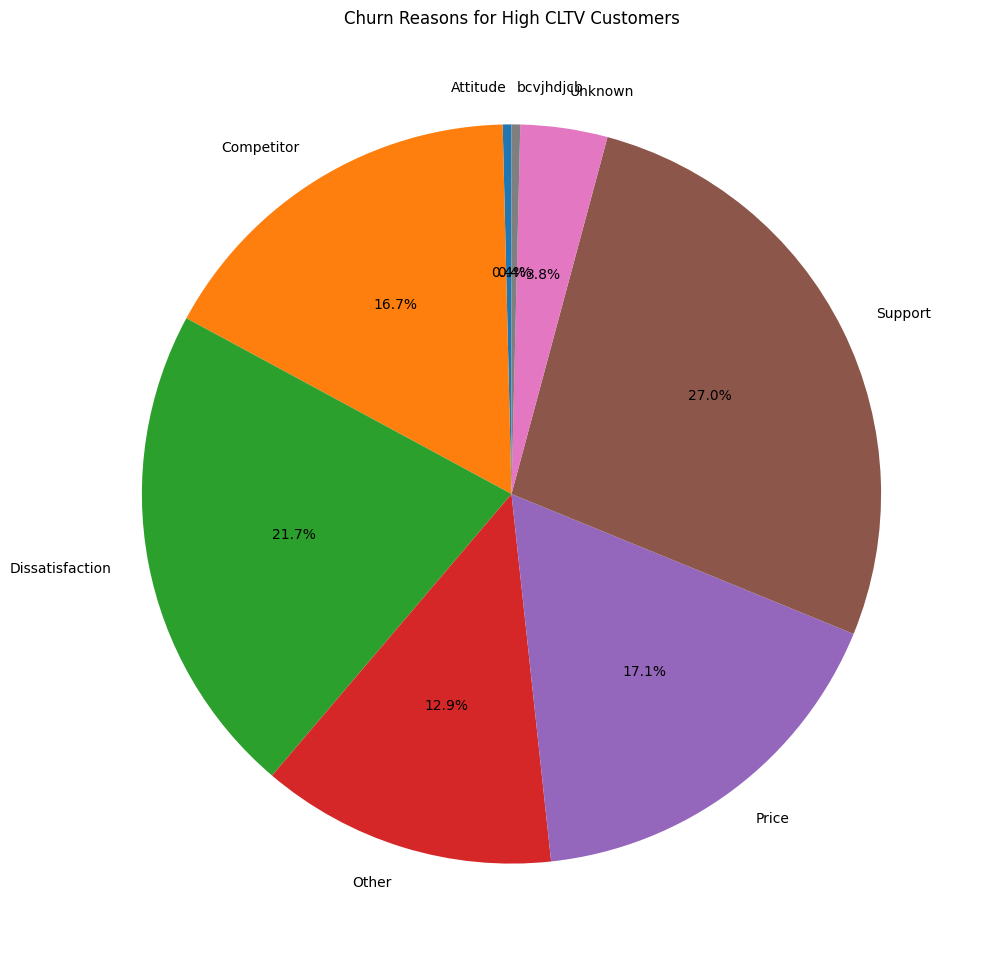

In [ ]:
# group by churn reason and calculate count
churn_reason_counts = churned_customers.groupby('Churn Category')['Customer ID'].count()

# plot pie chart
plt.figure(figsize=(20,12))
churn_reason_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ylabel='', title='Churn Reasons for High CLTV Customers')

**Observations**:

There are a variety of reasons why customers churned after completing 6 months with the company but most common factor would be support.

We can see support that dissatisfaction and price are the major ones.

**Recommendations**:

* It is recommended that the company focus on improving its support services, especially online and phone support, to reduce customer churn. This can be achieved by investing in training and development of support staff to enhance their expertise and provide better service to customers.

* It is important to identify and address the specific issues that are causing churn among high CLTV customers. This can be done through targeted surveys and feedback from customers who have churned, as well as by analyzing their behavior and preferences to identify areas for improvement.

* Pricing can be addressed by introducing dynamic pricing and offering competitive prices and promotions to retain high-value customers.

In [ ]:
churned_customers.head(2)

,Customer ID,Age,Month of Joining,Gender,Married,Dependents,arpu,roam_og,loc_og_t2t,loc_og_t2m,loc_og_t2f,std_og_t2t,std_og_t2m,std_og_t2f,isd_og,spl_og,og_others,total_rech_amt,total_rech_data,vol_4g,vol_5g,arpu_5g,arpu_4g,Churn Value,Referred a Friend,Number of Referrals,Phone Service,Multiple Lines,Internet Service,Internet Type,Streaming Data Consumption,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Satisfaction Score,Churn Category,Churn Reason,Tenure,total_recharge,outgoing_call_usage,data_usage,CLTV_total_arpu,total_recharge_dev,outgoing_call_usage_dev,data_usage_dev,Satisfaction Score_dev,loyalty_score,retention_score,customer_segment,completed_6_months,churned_within_6_months,not_completed_6_months
0,acbfpacthxbjj41043,26.0,6.0,Other,No,No,-100.140000,89.018333,767.983333,346.591667,50.248333,739.156367,896.496667,19.213333,67.515878,19.783333,64.196667,12613.0,52.0,450.046667,4634.835,901.580,438.220000,1,Yes,28.0,No,Yes,1,None,11,0,1,0,0,0,0,0,1,3.0,Other,Don't know,6.0,12665.0,8315.290000,13569.02,29740.504412,5.477163,5.083374,5.548314,5.6875,5.180159,5.364674,churned,1,0,0
1,aczqodakncqjy8397,38.0,6.0,Other,No,No,338.943333,51.378333,927.136169,629.483333,60.925095,175.596667,154.065000,55.698333,15.763333,47.839140,141.440000,10230.0,18.0,826.893333,2548.735,597.065,1718.675379,1,Yes,36.0,Yes,No,1,Cable,35,0,1,1,0,1,0,0,1,2.0,Price,Long distance charges,6.0,10248.0,13555.952424,3761.68,16410.298665,5.526108,5.576168,5.531548,5.5000,5.953717,6.849150,churned,1,0,0


#### **Retained**

In [ ]:
# select the data for retained customers
retained_customers = customer_df[customer_df['customer_segment'] == 'retained']


In [ ]:
# calculate the average CLTV for retained customers
avg_cltv = retained_customers['CLTV_total_arpu'].mean()

# display the average CLTV for retained customers
print('Average CLTV for Retained Customers:', round(avg_cltv, 2))



Average CLTV for Retained Customers: 19309.49


**Observations**:

It can be observed that the average CLTV value of retained customers is much higher than loyal customers. This suggests that the company should focus on retaining customers to increase their revenue and profitability.

**Recommendations**:

* Offer personalized and targeted incentives to retain customers who are at risk of churning. This could include offering discounts or promotions on popular services or providing excellent customer support to address any concerns or issues they may have.

* Focus on providing excellent customer support to retain customers, as this is a key factor in customer satisfaction and retention.

## **Feature Importance**

<IPython.core.display.Javascript object>

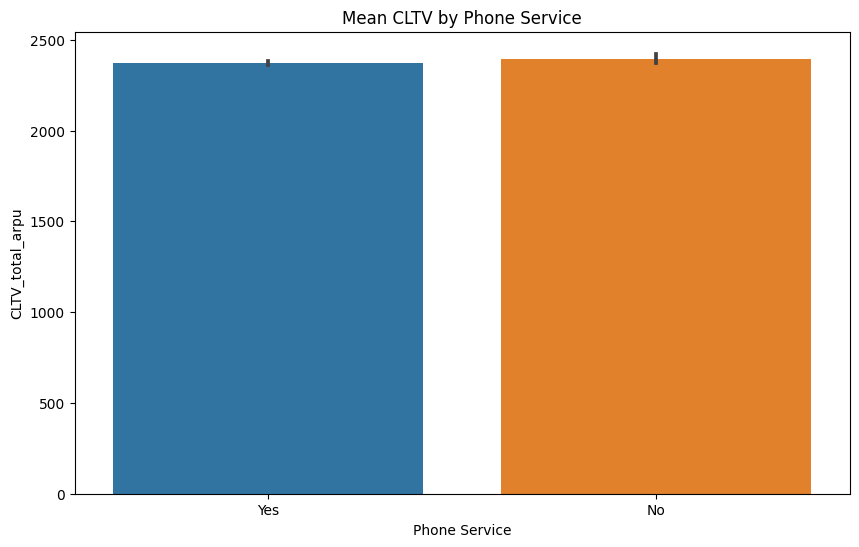

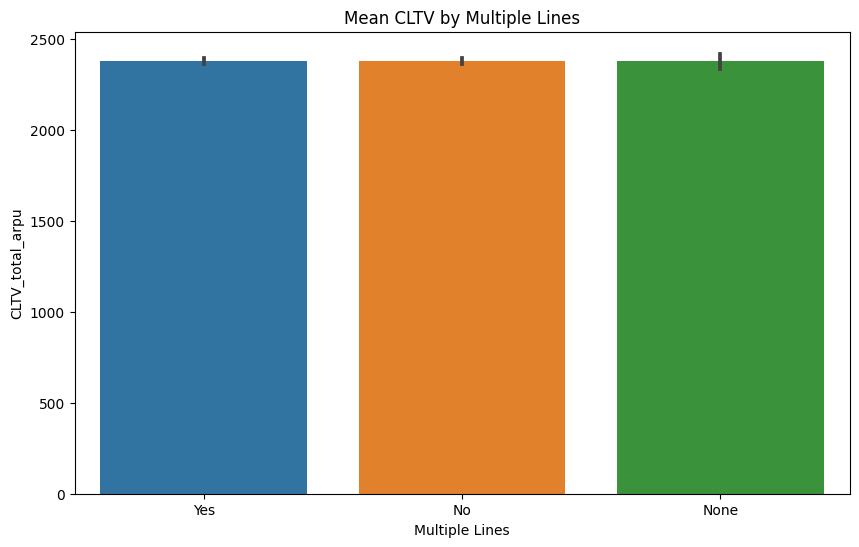

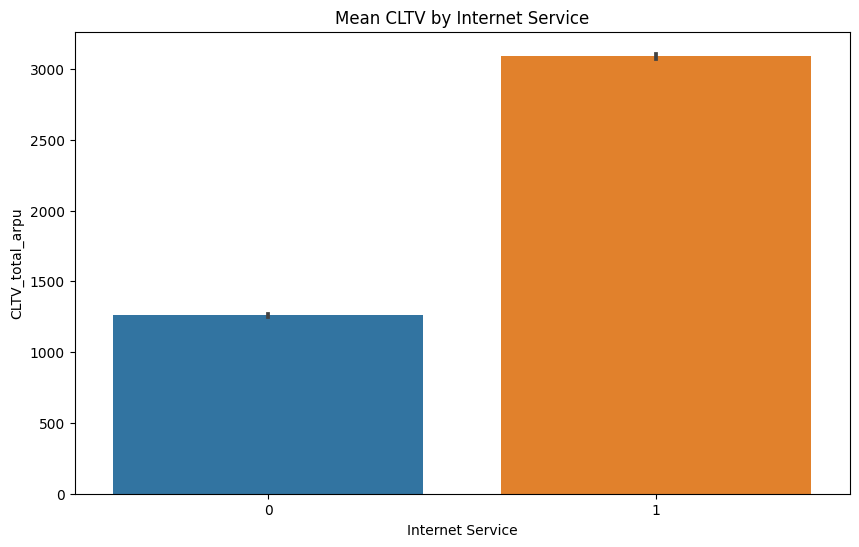

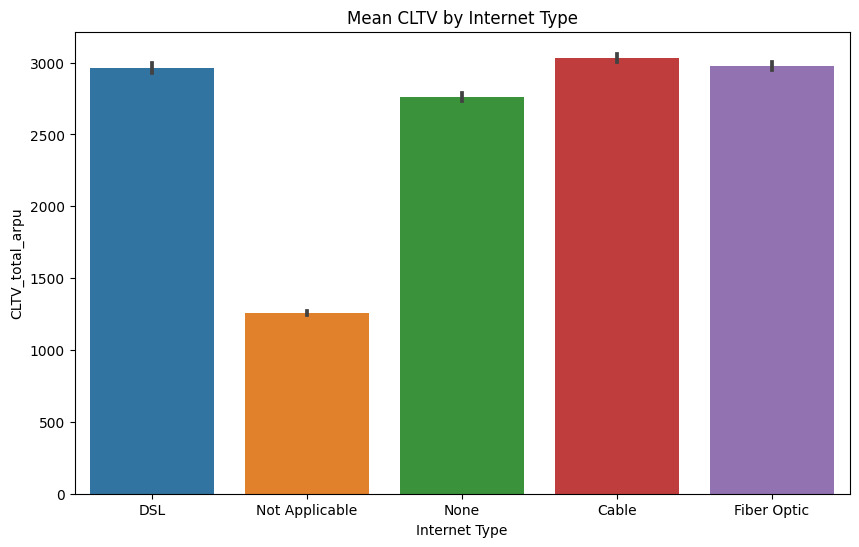

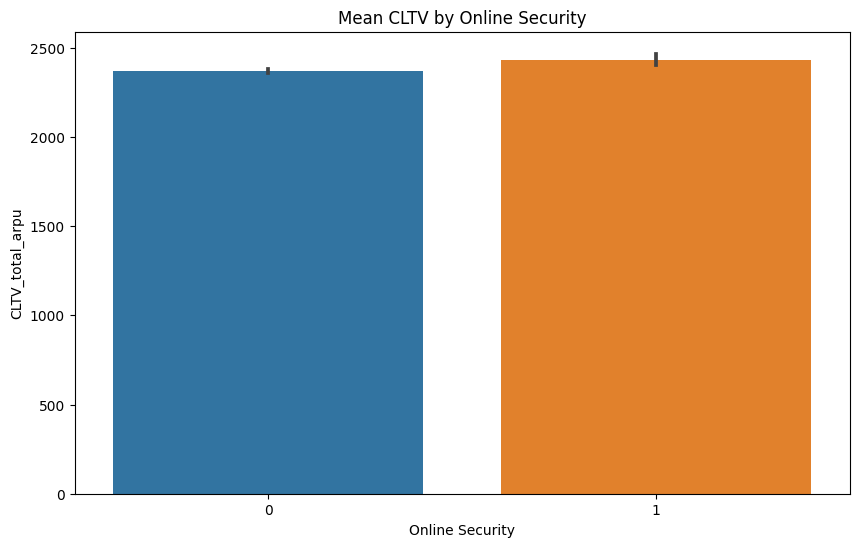

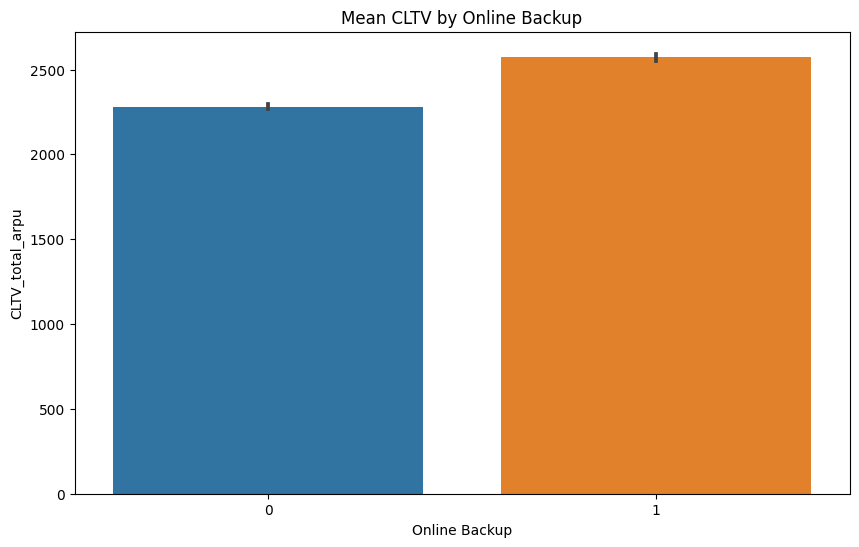

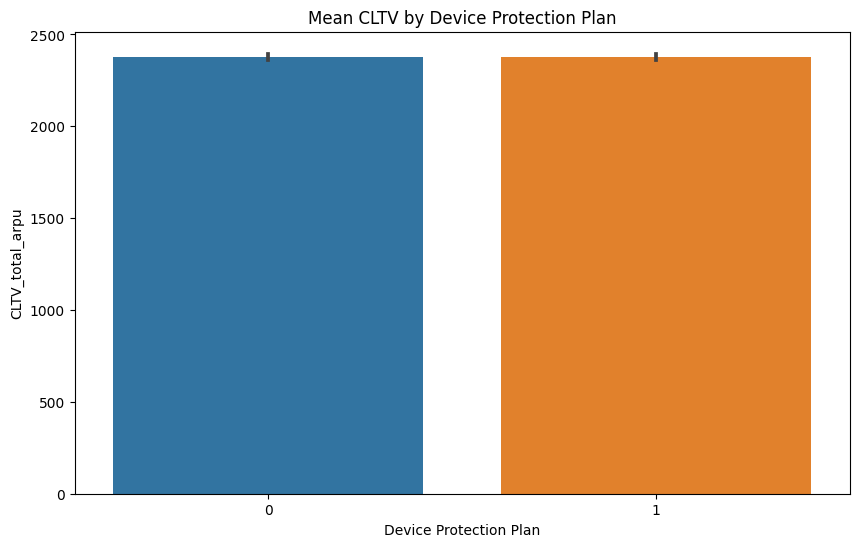

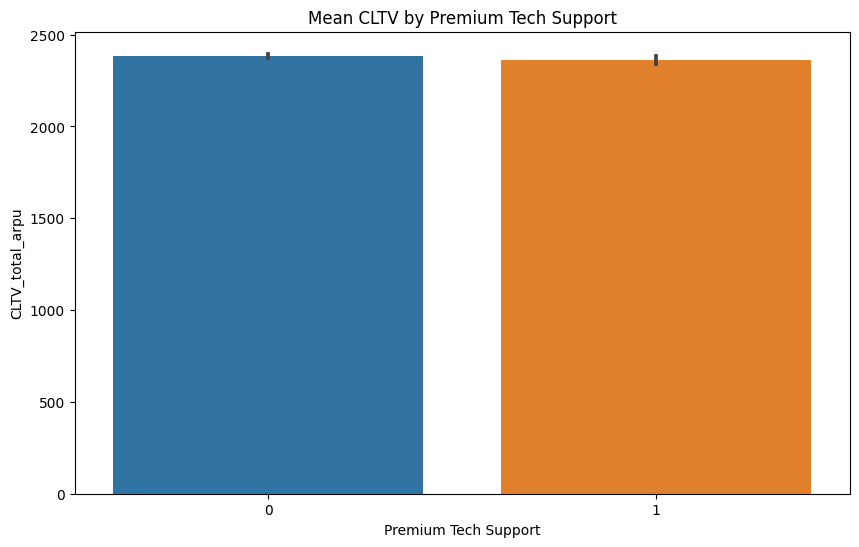

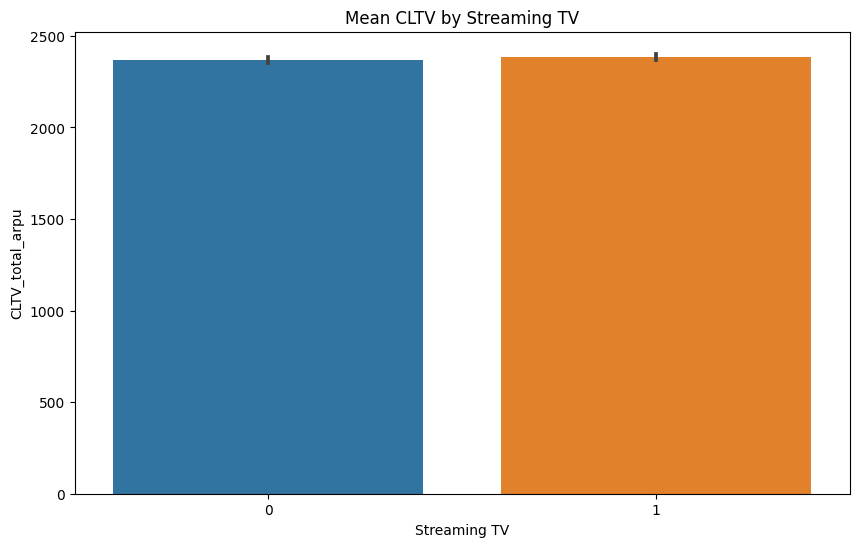

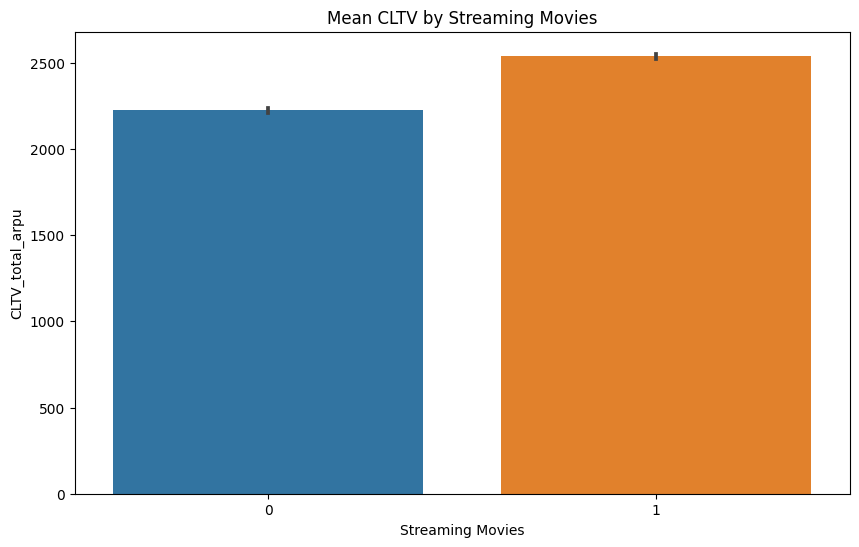

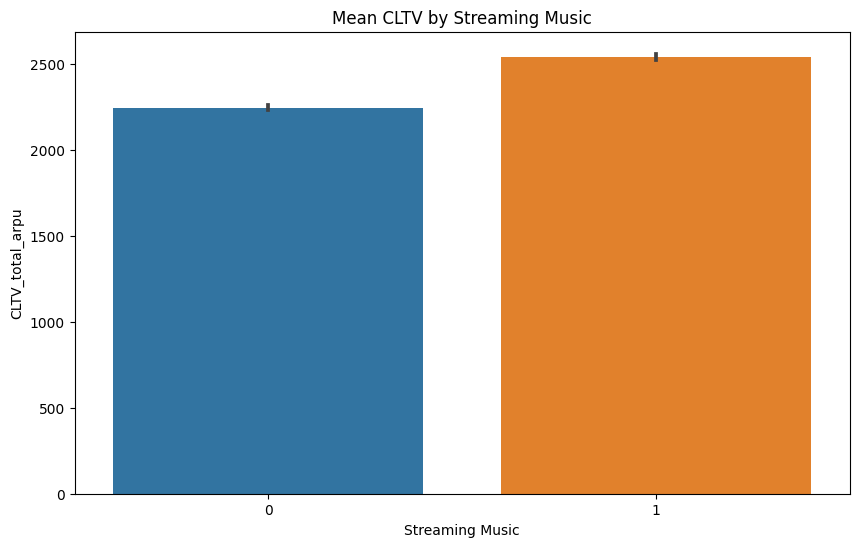

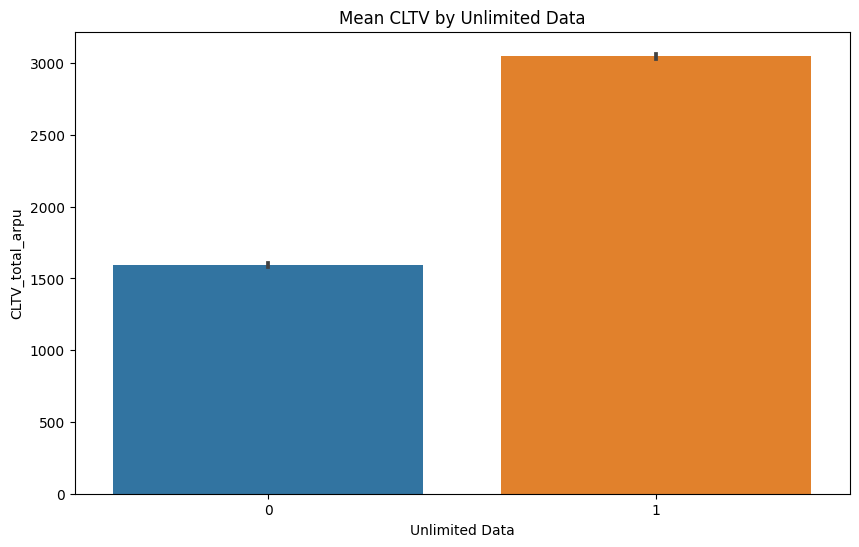

In [ ]:
# Categorical Services Column
cat_cols = ['Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data']

save_point("fcTel4")
# Loop over categorical columns
for col in cat_cols:
    # Create a barplot of mean CLTV by category
    plt.figure(figsize=(10,6))
    sns.barplot(x=col, y='CLTV_total_arpu', data=df_final)
    plt.title(f"Mean CLTV by {col}")
    plt.show()

**Observations and Insights:**

* Customers who use internet services, online backup, streaming movies and music, and unlimited data access tend to have higher Customer Lifetime Value (CLTV).
* Customers who have opted for multiple services, such as internet and online security or streaming movies and music with unlimited data access, have even higher CLTV.

**Recommendations:**

* The company should focus on providing high-quality internet services and online security features to retain and attract more customers.

* The company should consider promoting streaming movies and music services and unlimited data access to customers, as these are services that are associated with higher CLTV.

* The company should offer personalized bundles and promotions to customers who have subscribed to multiple services, as these customers tend to have higher CLTV.

* The company should analyze the reasons why customers aren't satisfied and find ways to improve their satisfaction with these services or encourage them to opt for more valuable services.

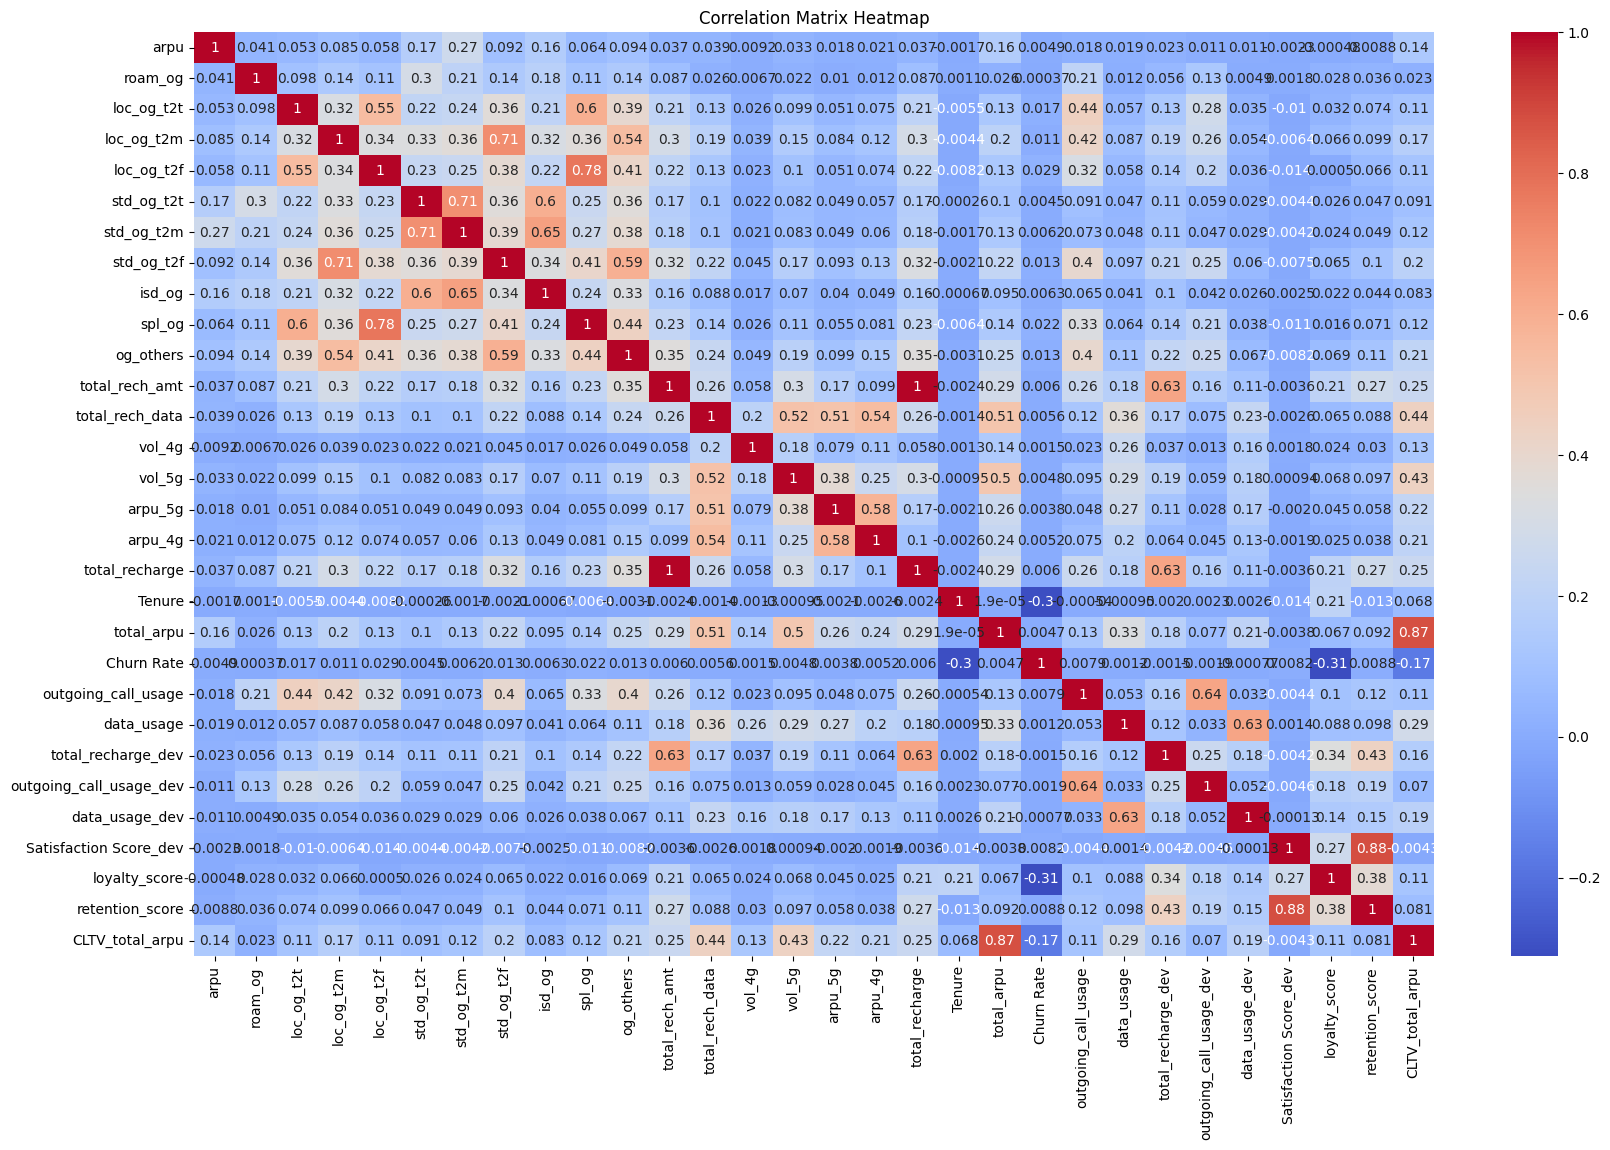

In [ ]:
# Create a correlation matrix
features = ['arpu', 'roam_og', 'loc_og_t2t', 'loc_og_t2m',
       'loc_og_t2f', 'std_og_t2t', 'std_og_t2m', 'std_og_t2f', 'isd_og',
       'spl_og', 'og_others', 'total_rech_amt', 'total_rech_data', 'vol_4g',
       'vol_5g', 'arpu_5g', 'arpu_4g',
       'total_recharge', 'offer', 'Tenure', 'total_arpu', 'Churn Rate',
       'outgoing_call_usage', 'data_usage', 'total_recharge_dev',
       'outgoing_call_usage_dev', 'data_usage_dev', 'Satisfaction Score_dev',
       'loyalty_score', 'retention_score', 'CLTV_total_arpu']
corr = df_final[features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

This shows the relationship of CLTV with revenue related columns, as we calculated CLTV from ARPU and many other features would influence ARPU.

## **High Value Customer Identification**

In [ ]:
# High-Value Customers:
high_value = customer_df[customer_df['CLTV_total_arpu'] > customer_df['CLTV_total_arpu'].quantile(0.75)]

In [ ]:
# Calculate average CLTV for high-value customers
avg_cltv = high_value['CLTV_total_arpu'].mean()

print("Average CLTV of high value customers: ", avg_cltv)

Average CLTV of high value customers:  28720.95648955717


In [ ]:
# Calculate churn rate for high-value customers
# Unique customer IDs and their churn values
cust_churn = high_value[['Customer ID', 'Churn Value']]

# Calculate the percentage of customers who churned out
churn_percent = round((cust_churn['Churn Value'].value_counts()[1] / len(cust_churn)) * 100, 2)

print("Percentage of customers who churned out:", churn_percent, "%")

Percentage of customers who churned out: 10.47 %


In [ ]:
# Calculate average age for high-value customers
avg_age = high_value['Age'].mean()

print("Average age for high value customers: ", avg_age)

Average age for high value customers:  36.52670659903135


<Figure size 1000x600 with 0 Axes>

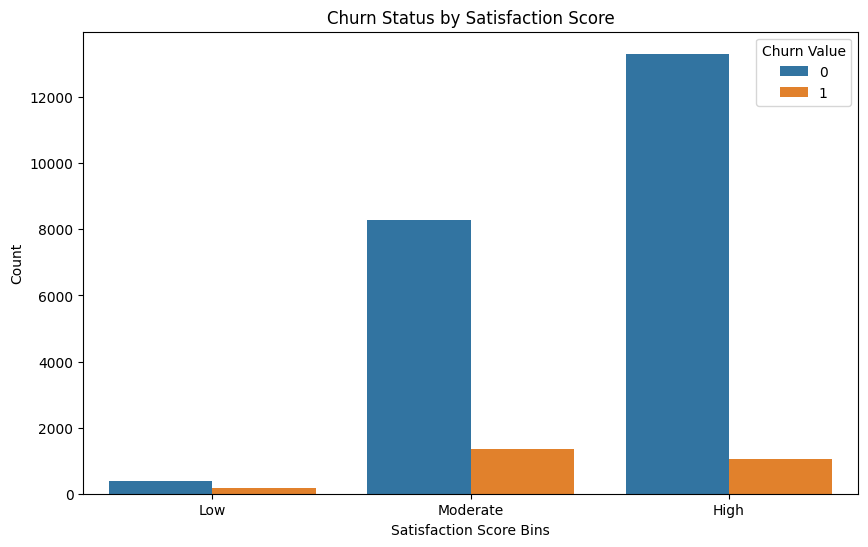

In [ ]:
# Satisfaction score among high valued customers
plt.figure(figsize=(10,6))
# Create bins for satisfaction score
bins = [0, 2, 3, 5]
labels = [ 'Low', 'Moderate', 'High']
high_value['Satisfaction Score Bins'] = pd.cut(high_value['Satisfaction Score'], bins=bins, labels=labels)

# Countplot of satisfaction score bins by churn status
plt.figure(figsize=(10,6))
sns.countplot(x='Satisfaction Score Bins', hue='Churn Value', data=high_value)

# Label and title
plt.xlabel('Satisfaction Score Bins')
plt.ylabel('Count')
plt.title('Churn Status by Satisfaction Score')
plt.show()


<Figure size 1000x600 with 0 Axes>

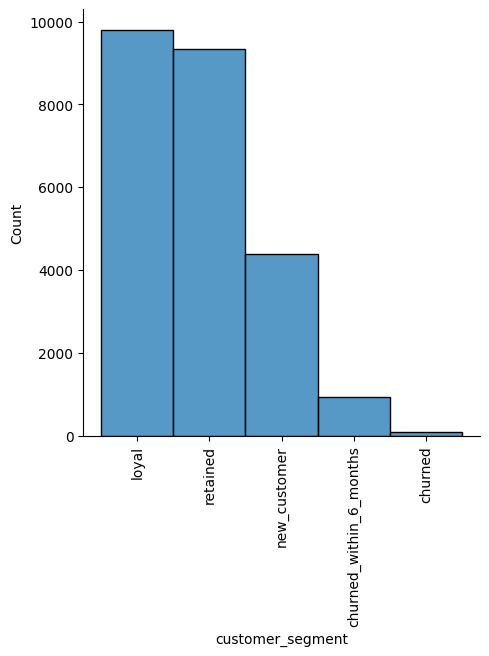

In [ ]:
# Plot distribution of customer segments in the high CLTV group
plt.figure(figsize=(10,6))
sns.displot(data=high_value, x='customer_segment', discrete=True)
plt.xticks(rotation=90)
plt.show()

**Observation**:

The number of customers who churned within six months are significantly high in high CLTV group.

This insight suggests that the company should focus on improving customer experience and providing more value to their high CLTV customers. They could conduct surveys or gather feedback to understand the specific reasons why these customers are churning and take actions to address those concerns. Additionally, the company could offer personalized rewards and promotions to these customers to make them feel valued and strengthen their attachment to the brand.

In [ ]:
# Let's see churned within six months
high_value_churned = high_value[high_value['customer_segment'] == 'churned_within_6_months']

<IPython.core.display.Javascript object>

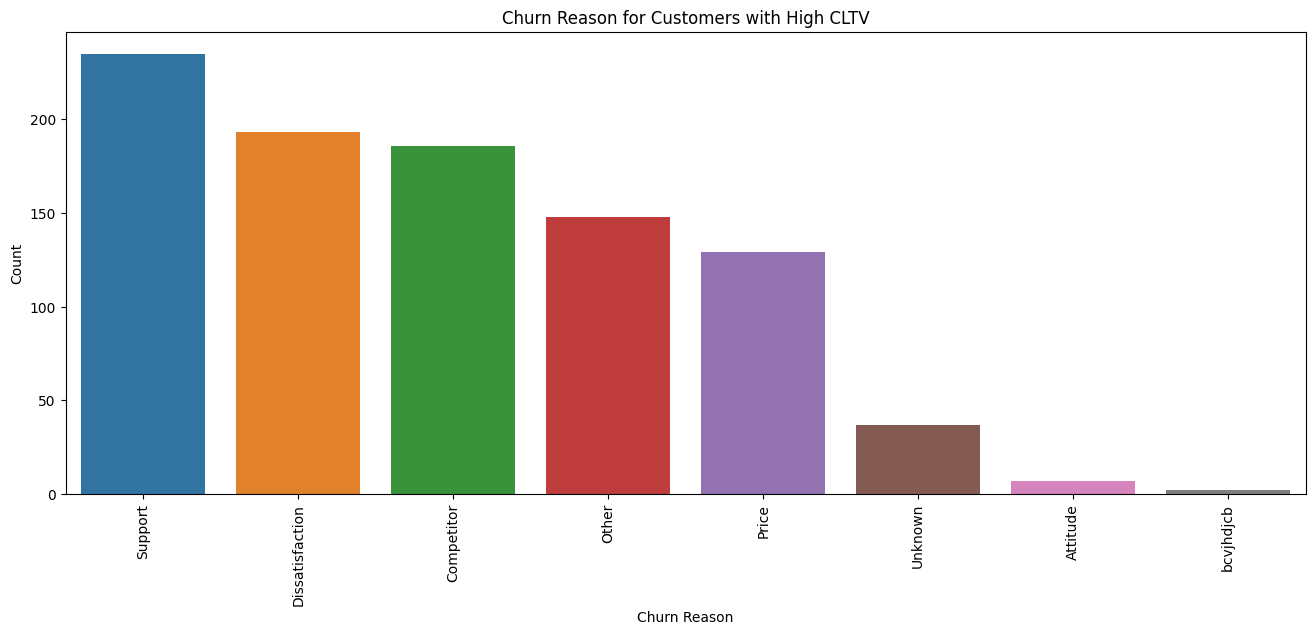

In [ ]:
# Most common reason
save_point("fcTel4")

# count the number of customers for each churn reason
hv_churn_reason_counts = high_value_churned['Churn Category'].value_counts()

# plot the churn reason counts
plt.figure(figsize=(16,6))
sns.barplot(x=hv_churn_reason_counts.index, y=hv_churn_reason_counts)
plt.title('Churn Reason for Customers with High CLTV')
plt.xlabel('Churn Reason')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Observation**

As per the analysis of the retention strategy for high valued customers who churned within 6 months, the most common reason for their churn is support. This suggests that there might be some issues with the support services provided by the company which led to the customers leaving. The company needs to focus on improving their support services to retain such high valued customers.

In [ ]:
low_cltv_df = customer_df[customer_df['CLTV_total_arpu'] > customer_df['CLTV_total_arpu'].quantile(0.25)]

<Figure size 1000x600 with 0 Axes>

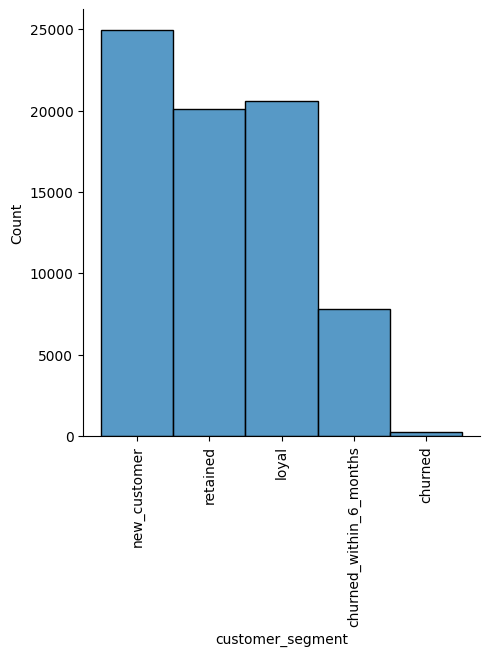

In [ ]:
# plot distribution of customer segments in low cltv
plt.figure(figsize=(10,6))
sns.displot(data=low_cltv_df, x='customer_segment', discrete=True)
plt.xticks(rotation=90)
plt.show()

There are a significant number of loyal and retained customers in the low CLTV group.

The company could consider offering more targeted promotions and discounts to the low CLTV group to incentivize them to try additional services and gain high revenue from these loyal customers.

The company could conduct surveys to better understand the needs and preferences of the low CLTV group and develop customized plans and services that meet their needs.

## **Future Ideas**

**Offer Analysis:**

* Analyze the effectiveness of different offers and promotions in terms of generating revenue and increasing CLTV.
* Identify which offers are most popular among loyal customers and which ones lead to the highest CLTV.
* Develop recommendations for future offers and promotions based on the analysis.


**Potential New Customers:**

* Analyze the behavior of new customers and identify which ones have the highest potential to become loyal customers.
* Analyze data to encourage these customers to become loyal and increase their CLTV.

**Retained Customers:**

* Analyze the behavior of retained customers who have a high average CLTV but are not yet classified as loyal customers.
* Develop strategies to convert these customers to loyal customers and maximize their CLTV.